In [1]:
import numpy as np
import os
import pandas as pd
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img=[]
for i in range(9):
    
    path="C:/Users/HP/Downloads/ClothingAttributeDataset/ClothingAttributeDataset/images/00000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path,color_mode="grayscale"))
    
for i in range(9,99):
    
    
    path="C:/Users/HP/Downloads/ClothingAttributeDataset/ClothingAttributeDataset/images/0000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path,color_mode="grayscale"))
for i in range(99,999):
    
    path="C:/Users/HP/Downloads/ClothingAttributeDataset/ClothingAttributeDataset/images/000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path,color_mode="grayscale"))
for i in range(999,1856):
    
    path="C:/Users/HP/Downloads/ClothingAttributeDataset/ClothingAttributeDataset/images/00"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path,color_mode="grayscale"))
    

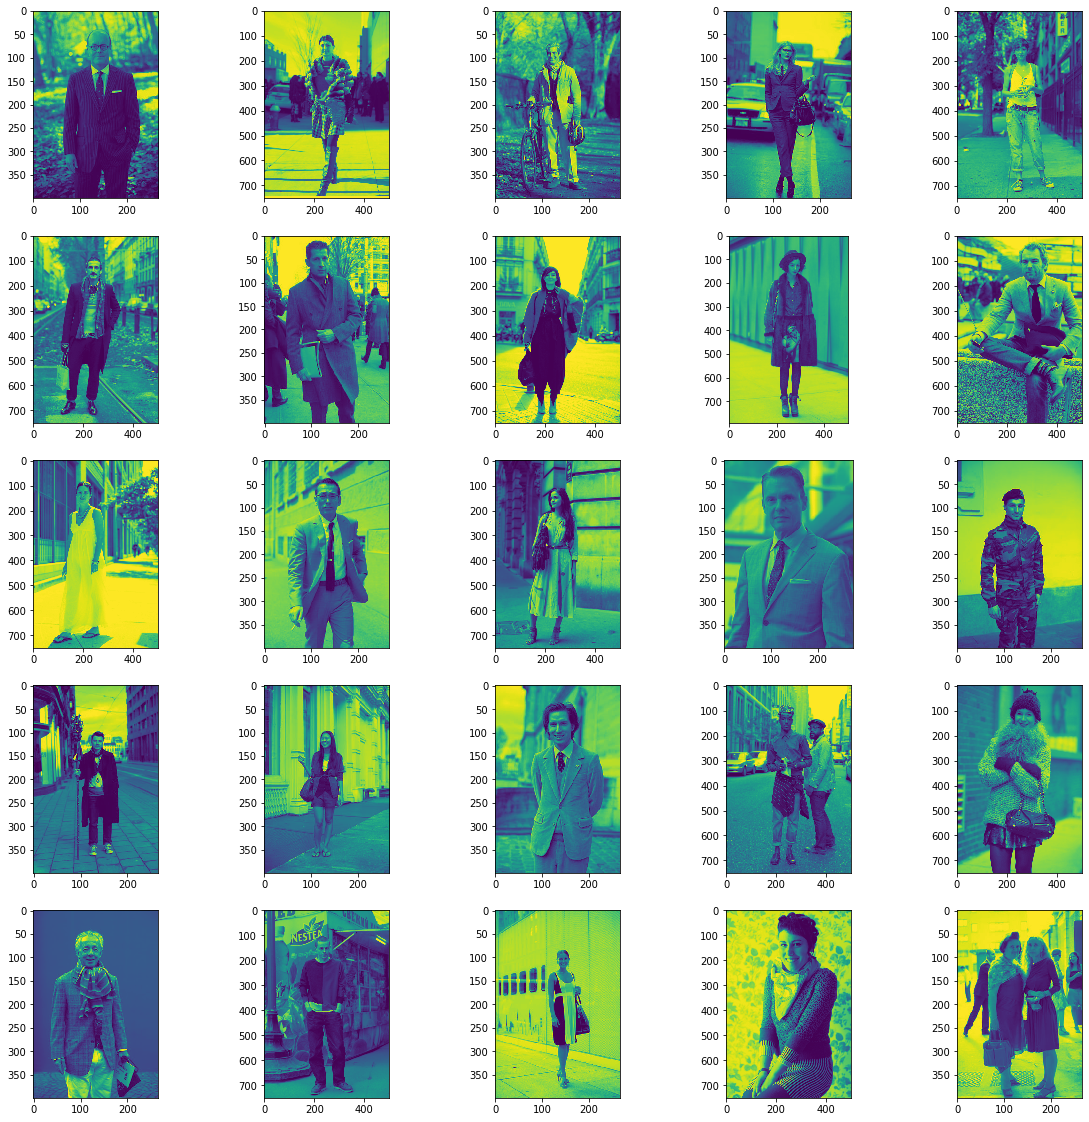

In [3]:
plt.figure(figsize=(20,20))
for i in range (5):
    for j in range (5):
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(img[i*5+j])

In [4]:
list0=[]
list1=[]
for i in range (1856):
    img1=np.asarray(img[i])
    list0.append(img1.shape[0])
    list1.append(img1.shape[1])
    
max(list0), min(list0), max(list1), min(list1)    

(1296, 299, 864, 240)

In [5]:
max0= 240
max1= min(list1)
data=np.zeros((1856,1,240,240,1),dtype=np.float32)
for i in range (1856):
    img1=np.asarray(img[i])
    a,b=img1.shape
    c=1
    img1=img1.reshape((1,a,b,c))
    x,y=img1.shape[1],img1.shape[2]
    
    imgt=tf.keras.layers.Cropping2D(
        cropping=(((x-max0)//2,(x-max0)//2), ((y-max1)//2,(y-max1)//2 ))
    )(img1)
    imgt=np.asarray(imgt)
    if(imgt.shape[1]==241):
         imgt=tf.keras.layers.Cropping2D(
         cropping=((1,0), (0,0))
         )(imgt)
    if(imgt.shape[2]==241):
        imgt=tf.keras.layers.Cropping2D(
        cropping=((0,0), (1,0))
        )(imgt)
        
    data[i,:,:,:,:]=imgt

In [6]:

data=data.reshape((1856,240,240))
data.shape

(1856, 240, 240)

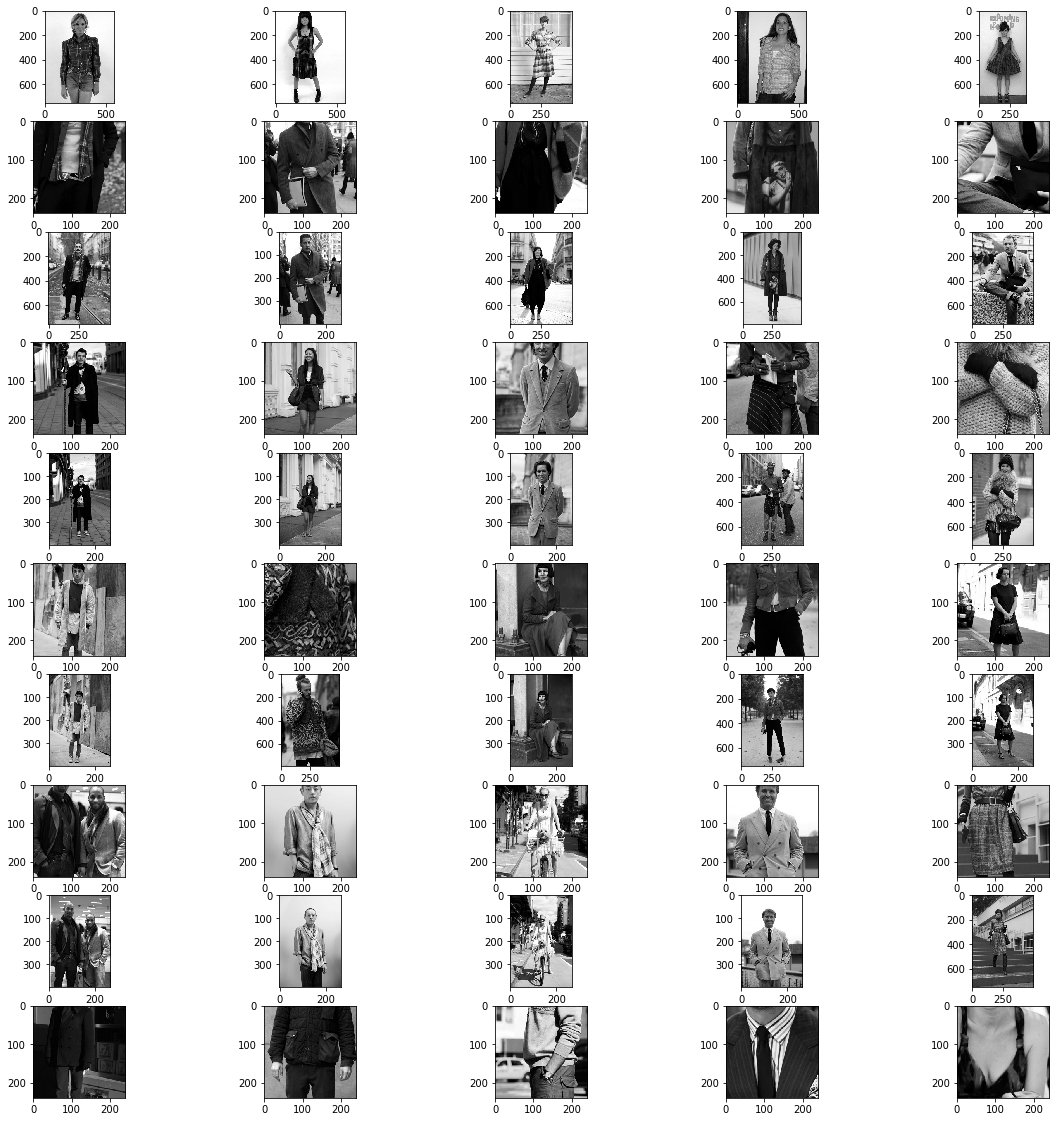

In [7]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(img[(i-1)*5+j],cmap='gray')
        

In [8]:
downsizing_model=keras.models.Sequential([
    keras.layers.AveragePooling2D((2,2),(2,2),input_shape=(240,240,1)),
    keras.layers.AveragePooling2D((2,2),(2,2))
])

In [9]:
downsizing_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 120, 120, 1)       0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 60, 60, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [10]:
data.shape

(1856, 240, 240)

In [11]:
data.shape

(1856, 240, 240)

In [12]:
 ##############temp checking##########################

In [13]:
data=downsizing_model.predict(data.reshape((-1,240,240,1)))

In [14]:
data.shape

(1856, 60, 60, 1)

In [15]:
data=data.reshape((-1,60,60))

In [ ]:
############end testeing ##############

In [ ]:
#########adding noise#############

In [76]:
data=(data-127.5)/127.5 ########remenber to remove it later

In [ ]:
noise = np.random.normal(0, .1, data.shape)

In [ ]:
data=data+noise

In [ ]:
############ end noise########################

In [ ]:
new_data=np.where(data<135,255-data,0)

In [ ]:
new_data.shape

In [ ]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j+100],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(new_data[(i-1)*5+j+100],cmap='gray')

In [ ]:
new_data=downsizing_model.predict(new_data.reshape((-1,240,240,1)))

In [ ]:
new_data.shape

In [ ]:
new_data=new_data.reshape((-1,60,60))

In [ ]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j+100],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(new_data[(i-1)*5+j+100],cmap='gray')

In [ ]:
data=new_data

In [ ]:
data.shape

In [ ]:
plt.figure(figsize=(20,20))
for i in range (5):
    
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j+100])
   

In [16]:
data=np.asarray(data)

In [17]:
import scipy.io
import os 

In [18]:
data_y=[]
data_y_col_name=[]
directory=r"C:\Users\HP\Downloads\ClothingAttributeDataset\ClothingAttributeDataset\labels"
for filename in os.listdir(directory):
    data_y_col_name.append(filename)
    path=os.path.join(directory, filename)
    data_y_temp=(scipy.io.loadmat(path))
    data_y.append(np.asarray(data_y_temp['GT']))

In [19]:
data_y_col_name

['black_GT.mat',
 'blue_GT.mat',
 'brown_GT.mat',
 'category_GT.mat',
 'collar_GT.mat',
 'cyan_GT.mat',
 'gender_GT.mat',
 'gray_GT.mat',
 'green_GT.mat',
 'many_colors_GT.mat',
 'neckline_GT.mat',
 'necktie_GT.mat',
 'pattern_floral_GT.mat',
 'pattern_graphics_GT.mat',
 'pattern_plaid_GT.mat',
 'pattern_solid_GT.mat',
 'pattern_spot_GT.mat',
 'pattern_stripe_GT.mat',
 'placket_GT.mat',
 'purple_GT.mat',
 'red_GT.mat',
 'scarf_GT.mat',
 'skin_exposure_GT.mat',
 'sleevelength_GT.mat',
 'white_GT.mat',
 'yellow_GT.mat']

In [20]:
data_y=np.asarray(data_y)

In [21]:
data_y=np.asarray(data_y)
data_y=data_y.T
data_y=data_y.reshape((1856,26))
data_y.shape

(1856, 26)

In [22]:
data_y_pd=pd.DataFrame(data_y,columns=data_y_col_name)

In [23]:
data_y_pd.head()

black_GT.mat  blue_GT.mat  brown_GT.mat  category_GT.mat  collar_GT.mat  \
0           2.0          1.0           1.0              5.0            2.0   
1           1.0          1.0           1.0              NaN            NaN   
2           2.0          1.0           1.0              4.0            2.0   
3           2.0          1.0           1.0              5.0            2.0   
4           1.0          1.0           1.0              6.0            1.0   

   cyan_GT.mat  gender_GT.mat  gray_GT.mat  green_GT.mat  many_colors_GT.mat  \
0          1.0            1.0          1.0           1.0                 1.0   
1          1.0            2.0          2.0           1.0                 1.0   
2          1.0            1.0          2.0           1.0                 1.0   
3          1.0            2.0          1.0           1.0                 1.0   
4          1.0            2.0          1.0           1.0                 1.0   

   ...  pattern_spot_GT.mat  pattern_stripe_GT.mat  placket_GT.mat  \
0  ...                  NaN                    NaN             2.0   
1  ...                  1.0                    NaN             2.0   
2  ...                  1.0                    1.0             2.0   
3  ...                  1.0                    1.0             2.0   
4  ...                  1.0                    1.0             1.0   

   purple_GT.mat  red_GT.mat  scarf_GT.mat  skin_exposure_GT.mat  \
0            1.0         1.0           1.0                   1.0   
1            1.0         1.0           1.0                   1.0   
2            1.0         1.0           2.0                   1.0   
3            1.0         1.0           1.0                   1.0   
4            1.0         1.0           1.0                   2.0   

   sleevelength_GT.mat  white_GT.mat  yellow_GT.mat  
0                  3.0           1.0            1.0  
1                  3.0           1.0            1.0  
2                  3.0           1.0            1.0  
3                  3.0           1.0            1.0  
4                  1.0           2.0            1.0  

[5 rows x 26 columns]

In [24]:
data_y_pd.drop(['black_GT.mat','blue_GT.mat','brown_GT.mat','cyan_GT.mat','gray_GT.mat','green_GT.mat','many_colors_GT.mat','purple_GT.mat','red_GT.mat','white_GT.mat','yellow_GT.mat'],axis=1, inplace=True)

In [25]:
print(data_y_pd.shape)
data_y_pd.head()

(1856, 15)


category_GT.mat  collar_GT.mat  gender_GT.mat  neckline_GT.mat  \
0              5.0            2.0            1.0              1.0   
1              NaN            NaN            2.0              2.0   
2              4.0            2.0            1.0              NaN   
3              5.0            2.0            2.0              NaN   
4              6.0            1.0            2.0              NaN   

   necktie_GT.mat  pattern_floral_GT.mat  pattern_graphics_GT.mat  \
0             2.0                    1.0                      1.0   
1             1.0                    1.0                      1.0   
2             1.0                    1.0                      1.0   
3             2.0                    1.0                      1.0   
4             1.0                    1.0                      1.0   

   pattern_plaid_GT.mat  pattern_solid_GT.mat  pattern_spot_GT.mat  \
0                   1.0                   NaN                  NaN   
1                   1.0                   1.0                  1.0   
2                   1.0                   2.0                  1.0   
3                   1.0                   2.0                  1.0   
4                   1.0                   2.0                  1.0   

   pattern_stripe_GT.mat  placket_GT.mat  scarf_GT.mat  skin_exposure_GT.mat  \
0                    NaN             2.0           1.0                   1.0   
1                    NaN             2.0           1.0                   1.0   
2                    1.0             2.0           2.0                   1.0   
3                    1.0             2.0           1.0                   1.0   
4                    1.0             1.0           1.0                   2.0   

   sleevelength_GT.mat  
0                  3.0  
1                  3.0  
2                  3.0  
3                  3.0  
4                  1.0

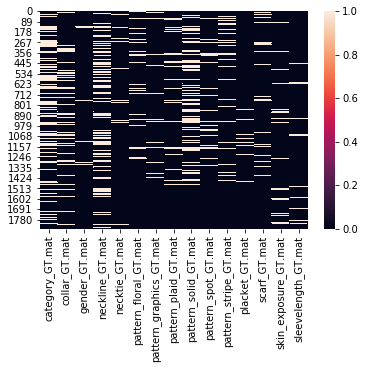

In [26]:
sns.heatmap(data_y_pd.isnull())

In [27]:
data_y_pd.isnull().sum()

category_GT.mat            752
collar_GT.mat              394
gender_GT.mat               62
neckline_GT.mat            542
necktie_GT.mat             117
pattern_floral_GT.mat      138
pattern_graphics_GT.mat     78
pattern_plaid_GT.mat       116
pattern_solid_GT.mat       363
pattern_spot_GT.mat        136
pattern_stripe_GT.mat      182
placket_GT.mat              73
scarf_GT.mat               190
skin_exposure_GT.mat       166
sleevelength_GT.mat         75
dtype: int64

In [28]:
data_y_pd.describe()

category_GT.mat  collar_GT.mat  gender_GT.mat  neckline_GT.mat  \
count      1104.000000    1462.000000    1794.000000      1314.000000   
mean          4.407609       1.612175       1.575251         1.693303   
std           1.975043       0.487421       0.494443         0.743287   
min           1.000000       1.000000       1.000000         1.000000   
25%           3.000000       1.000000       1.000000         1.000000   
50%           5.000000       2.000000       2.000000         2.000000   
75%           6.000000       2.000000       2.000000         2.000000   
max           7.000000       2.000000       2.000000         3.000000   

       necktie_GT.mat  pattern_floral_GT.mat  pattern_graphics_GT.mat  \
count     1739.000000            1718.000000              1778.000000   
mean         1.121334               1.040163                 1.061867   
std          0.326609               0.196398                 0.240982   
min          1.000000               1.000000                 1.000000   
25%          1.000000               1.000000                 1.000000   
50%          1.000000               1.000000                 1.000000   
75%          1.000000               1.000000                 1.000000   
max          2.000000               2.000000                 2.000000   

       pattern_plaid_GT.mat  pattern_solid_GT.mat  pattern_spot_GT.mat  \
count           1740.000000           1493.000000          1720.000000   
mean               1.060345              1.704622             1.058721   
std                0.238193              0.456366             0.235170   
min                1.000000              1.000000             1.000000   
25%                1.000000              1.000000             1.000000   
50%                1.000000              2.000000             1.000000   
75%                1.000000              2.000000             1.000000   
max                2.000000              2.000000             2.000000   

       pattern_stripe_GT.mat  placket_GT.mat  scarf_GT.mat  \
count            1674.000000     1783.000000   1666.000000   
mean                1.083632        1.650028      1.140456   
std                 0.276918        0.477095      0.347564   
min                 1.000000        1.000000      1.000000   
25%                 1.000000        1.000000      1.000000   
50%                 1.000000        2.000000      1.000000   
75%                 1.000000        2.000000      1.000000   
max                 2.000000        2.000000      2.000000   

       skin_exposure_GT.mat  sleevelength_GT.mat  
count           1690.000000          1781.000000  
mean               1.114201             2.607524  
std                0.318150             0.670678  
min                1.000000             1.000000  
25%                1.000000             2.000000  
50%                1.000000             3.000000  
75%                1.000000             3.000000  
max                2.000000             3.000000

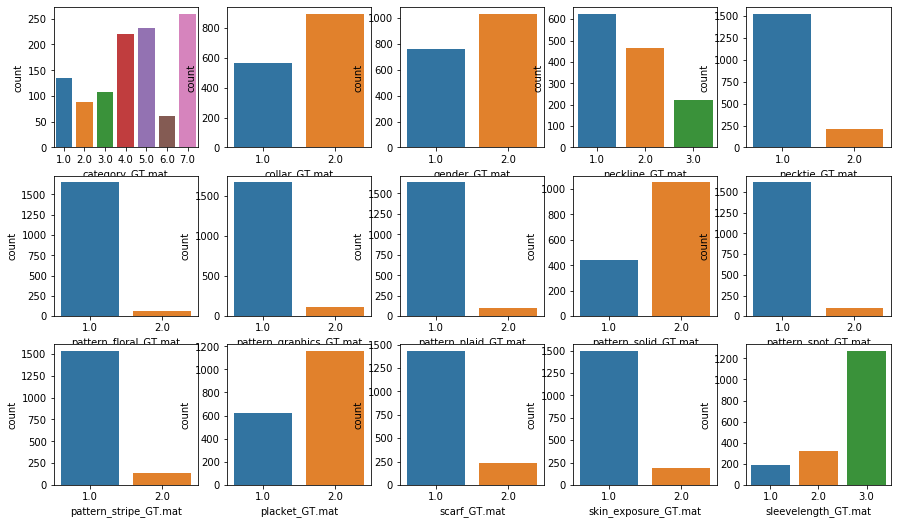

In [29]:
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    sns.countplot(x=data_y_pd.iloc[:,i],data=data_y_pd)
plt.show()

In [30]:
for col_name in data_y_pd.columns: 
    if col_name=='slevelength_GT.mat':
        data_y_pd[col_name].fillna(data_y_pd[col_name].mode(),inplace=True)
    elif col_name=='category_GT.mat':
        data_y_pd[col_name].fillna(8,inplace=True)
    elif col_name=='neckline_GT.mat':
        data_y_pd[col_name].fillna(4,inplace=True)
    else:
        data_y_pd[col_name].fillna(1,inplace=True)

In [31]:
data_y_pd.head(1)

category_GT.mat  collar_GT.mat  gender_GT.mat  neckline_GT.mat  \
0              5.0            2.0            1.0              1.0   

   necktie_GT.mat  pattern_floral_GT.mat  pattern_graphics_GT.mat  \
0             2.0                    1.0                      1.0   

   pattern_plaid_GT.mat  pattern_solid_GT.mat  pattern_spot_GT.mat  \
0                   1.0                   1.0                  1.0   

   pattern_stripe_GT.mat  placket_GT.mat  scarf_GT.mat  skin_exposure_GT.mat  \
0                    1.0             2.0           1.0                   1.0   

   sleevelength_GT.mat  
0                  3.0

In [32]:
data_y=np.asarray(data_y_pd)
data_y=data_y-1

In [33]:
data_y[0]

array([4., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2.])

In [34]:
data_y_pd=pd.DataFrame(data_y)

In [35]:
data_y_pd.head(1)

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
0  4.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0

In [36]:
data_y_pd=pd.get_dummies(data_y_pd,columns=[0,3,14])

In [37]:
data_y_pd.head()

1    2    4    5    6    7    8    9   10   11  ...  0_5.0  0_6.0  0_7.0  \
0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...      0      0      0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...      0      0      1   
2  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...      0      0      0   
3  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...      0      0      0   
4  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...      1      0      0   

   3_0.0  3_1.0  3_2.0  3_3.0  14_0.0  14_1.0  14_2.0  
0      1      0      0      0       0       0       1  
1      0      1      0      0       0       0       1  
2      0      0      0      1       0       0       1  
3      0      0      0      1       0       0       1  
4      0      0      0      1       1       0       0  

[5 rows x 27 columns]

In [38]:
data_y=np.asarray(data_y_pd)

In [39]:
temp=np.sum(data_y[:,3:9],axis=1)

In [40]:
data_y

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [41]:
data_y[:,5:11]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [42]:
r=range(1856)
t=np.zeros((1856))
key={}
for i in range(1856):
    a=data_y==data_y[i]
    for xi,x in enumerate(a):
        if(np.sum(x)==27 and t[xi]==0):
            t[xi]=r[i]
            key[r[i]]=list(data_y[i])


In [43]:
unique=[]
count=[]
for x in t:
    if x in unique:
        ind=unique.index(x)
        count[ind]=count[ind]+1
    else:
        unique.append(x)
        count.append(1)
    

In [44]:
len(unique),len(count)

(660, 660)

In [45]:
del key[0]

In [46]:
key

{1: [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 2: [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 3: [1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 4: [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0],
 5: [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 6: [1.0,
  0.0,
  0.0,
  0.0,
  0.

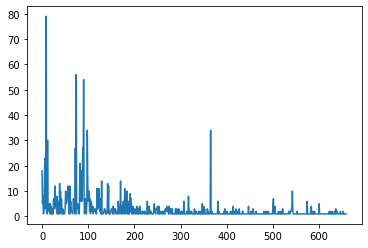

In [47]:
plt.plot(range(len(count)),count)


In [93]:
t_count=np.asarray(count)
temp=np.where(t_count>10)

In [94]:
temp

(array([  0,   5,   6,   9,  12,  28,  38,  56,  60,  72,  74,  82,  83,
         85,  88,  89,  90,  98,  99, 119, 123, 129, 142, 144, 170, 179,
        365], dtype=int64),)

In [48]:
t=np.asarray(t,dtype=int)

In [49]:
t

array([ 222,    1,    2, ..., 1853,  705, 1441])

In [50]:
temp1=[]
key2={}

for a in t:
    if a in temp1:
        continue
    else:
        temp1.append(a)
        key2[a]=temp1.index(a)

In [51]:
len(temp1)

660

In [52]:
y=[]
for ti in t:
    y.append(temp1.index(ti))

In [53]:
y=np.asarray(y)

In [54]:
scipy.stats.mode(y)

ModeResult(mode=array([9]), count=array([79]))

In [55]:
y

array([  0,   1,   2, ..., 659, 317, 490])

In [56]:

def build_dis():
    in_label = keras.layers.Input(shape=(1,))
    
    in_label2=keras.layers.Embedding(660,60)(in_label)
    labels_layer1 = keras.layers.Dense(60 * 60)(in_label2)
    labels_layer1=keras.layers.LeakyReLU(0.2)(labels_layer1)
    labels_layer2 = keras.layers.Reshape((60, 60,1))(labels_layer1)
    
    in_image = keras.layers.Input(shape=(60,60,1))

    merge = keras.layers.Concatenate()([in_image, labels_layer2])


  
    
    l1=merge
    l2=keras.layers.Conv2D(128, (3,3), (2,2), padding="same")(l1)
    l2=keras.layers.LeakyReLU(0.2)(l2)
   
    
    
    l3=keras.layers.Conv2D(128, (3,3), (1,1), padding="same")(l2)
    l3=keras.layers.LeakyReLU(0.2)(l3)
  
       
 
    
    l4=keras.layers.Conv2D(64, (3,3), (2,2), padding="same")(l3)
    l4=keras.layers.LeakyReLU(0.2)(l4)

    
    
    l4=keras.layers.Flatten()(l4)
    l4=keras.layers.Dropout(0.3)(l4)
    l_final=keras.layers.Dense(1, activation='sigmoid')(l4)

    dis = keras.Model([in_image, in_label], l_final)
    return dis
################33

dis=build_dis()
from keras.optimizers import Adam
opt = Adam(lr=0.0002, beta_1=0.5)


dis.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [57]:
dis.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 60)        39600       input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 3600)      219600      embedding[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 1, 3600)      0           dense[0][0]                      
_______________________________________________________________________________________

In [58]:
def build_generator():
    in_label = keras.layers.Input(shape=(1,))
    in_label2=keras.layers.Embedding(660,60)(in_label)
    label1=keras.layers.Dense(225)(in_label2)
    label1=keras.layers.LeakyReLU(0.2)(label1)
    label2=keras.layers.Reshape((15,15,1))(label1)

    
   
    
    

    in_img=keras.layers.Input(shape=(100,))
    img1=keras.layers.Dense(32*15*15)(in_img)
    img1=keras.layers.LeakyReLU(0.2)(img1)
    img2=keras.layers.Reshape((15,15,32))(img1)


    merge = keras.layers.Concatenate()([label2,img2 ])

    
    l1=keras.layers.Conv2DTranspose( 128,(4,4), (2,2),padding='same', )(merge)
    l1 = keras.layers.LeakyReLU(alpha=0.2)(l1)
   
       
    l1=keras.layers.Dropout(0.1)(l1)
    
    
    l2=keras.layers.Conv2DTranspose( 128,(4,4), (2,2),padding='same')(l1)
    l2 = keras.layers.LeakyReLU(alpha=0.2)(l2)
   
       
    l2=keras.layers.Dropout(0.1)(l2)
    
    
    l3=keras.layers.Conv2DTranspose( 64,(4,4), (1,1),padding='same',dtype='float32')(l2)
    l3 = keras.layers.LeakyReLU(alpha=0.2)(l3)
    l3=keras.layers.Dropout(0.2)(l3)
    
  
    l_final2=keras.layers.Conv2D(1, (5,5), (1,1), padding="same", activation="tanh")(l3)

    gen = keras.Model([in_img,in_label], l_final2)
    return gen

gen=build_generator()
gen.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 60)        39600       input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1, 225)       13725       embedding_1[0][0]                
_______________________________________________________________________________________

In [59]:
def define_gan(g_model, d_model):
    d_model.trainable = False

    gen_noise, gen_label = g_model.input

    gen_output = g_model.output

    gan_output = d_model([gen_output, gen_label])
    
    model = keras.Model([gen_noise, gen_label], gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [60]:
gan=define_gan(gen,dis)

In [61]:
def load_real_samples():

    X = np.expand_dims(data, axis=-1)

    X = X.astype('float32')
   
    X=(X-127.5)/127.5

    return [X,y]


import random
def generate_real_samples(n_samples):

    images, labels = load_real_samples()
 
    ix = random.sample(range(images.shape[0]), n_samples)

    X, labels = images[ix], labels[ix]

    y1 = np.ones((n_samples, 1))
    return [X, labels], y1

In [62]:
generate_real_samples(1)

([array([[[[ 0.60490197],
           [ 0.5735294 ],
           [ 0.5009804 ],
           ...,
           [ 0.25245097],
           [ 0.29558823],
           [ 0.4107843 ]],
  
          [[ 0.1754902 ],
           [ 0.31960785],
           [ 0.46617648],
           ...,
           [ 0.25245097],
           [ 0.19607843],
           [ 0.21421568]],
  
          [[-0.50735295],
           [-0.4019608 ],
           [ 0.23382352],
           ...,
           [ 0.44509804],
           [ 0.4019608 ],
           [ 0.40294117]],
  
          ...,
  
          [[-0.51617646],
           [-0.5764706 ],
           [-0.5892157 ],
           ...,
           [ 0.62941176],
           [ 0.6372549 ],
           [ 0.6377451 ]],
  
          [[-0.48284313],
           [-0.5259804 ],
           [-0.5348039 ],
           ...,
           [ 0.6279412 ],
           [ 0.6357843 ],
           [ 0.64705884]],
  
          [[-0.45196077],
           [-0.45539215],
           [-0.46911764],
           ...,
        

In [63]:
def generate_latent_points(latent_dim, n_samples, n_classes=660):

    x_input = np.random.randn(latent_dim * n_samples)

    z_input = x_input.reshape(n_samples, latent_dim)
    
    labels = np.random.randint(0, n_classes, n_samples)
    return [z_input, labels]
 

def generate_fake_samples(generator, latent_dim, n_samples):

    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
 

    images = generator.predict([z_input, labels_input])

    y = np.zeros((n_samples, 1))
    return [images, labels_input], y

In [64]:
############checking the data is the desired data or not####################

In [65]:
data.shape

(1856, 60, 60)

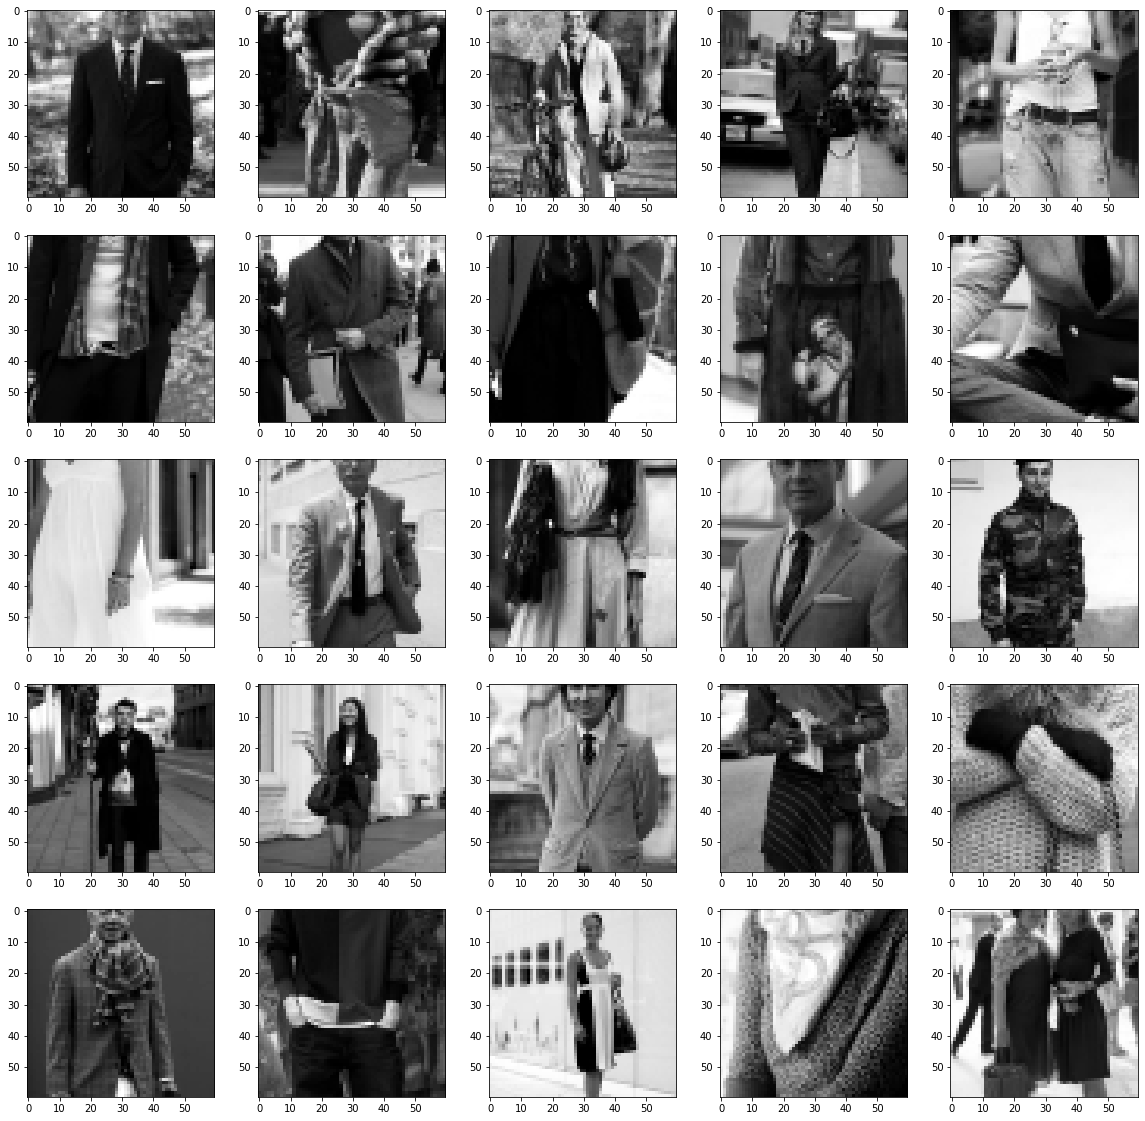

In [66]:
plt.figure(figsize=(20,20))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(data[i].reshape((60,60)),cmap='gray')

In [67]:
#############checking done####################################

In [68]:
# train the generator and discriminator
d_1=[]
d_2=[]
ga_=[]
def train(g_model, d_model, gan_model, latent_dim, n_epochs=100, n_batch=128):
    print("here")
    bat_per_epo = 3*int(data.shape[0] / n_batch)
    print(bat_per_epo)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        print("here")
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            print(i+1,j+1)
            # get randomly selected 'real' samples
            [X_real, labels_real], y_real = generate_real_samples( half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
            # generate 'fake' examples
            [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
            # prepare points in latent space as input for the generator
            [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
            # summarize loss on this batch
            d_1.append(d_loss1)
            d_2.append(d_loss2)
            ga_.append(g_loss)
        
        if(i%10==0):
            [predictions,_],_ = generate_fake_samples(gen,100,25)
            predictions=np.asarray(predictions)
            plt.figure(figsize=(20,20))
            for it in range(25):
                  plt.subplot(5, 5, it+1)
                  plt.imshow(predictions[it].reshape((60,60)) * 127.5 + 127.5, cmap='gray')
                  plt.axis('off')
            plt.savefig('hb_w_image_at_epoch_{:04d}.png'.format(i))
            plt.figure(figsize=(10,10))
            plt.plot(ga_,label='ga_')
            plt.plot(d_1,label='d_1')
            plt.plot(d_2,label='d_2')
            plt.savefig('hb_w_graph_at_epoch_{:04d}.png'.format(i))
            plt.legend()
    
    # save the generator model
    



here
42
here
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
here
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
here
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
here
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
here
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 

35 24
35 25
35 26
35 27
35 28
35 29
35 30
35 31
35 32
35 33
35 34
35 35
35 36
35 37
35 38
35 39
35 40
35 41
35 42
here
36 1
36 2
36 3
36 4
36 5
36 6
36 7
36 8
36 9
36 10
36 11
36 12
36 13
36 14
36 15
36 16
36 17
36 18
36 19
36 20
36 21
36 22
36 23
36 24
36 25
36 26
36 27
36 28
36 29
36 30
36 31
36 32
36 33
36 34
36 35
36 36
36 37
36 38
36 39
36 40
36 41
36 42
here
37 1
37 2
37 3
37 4
37 5
37 6
37 7
37 8
37 9
37 10
37 11
37 12
37 13
37 14
37 15
37 16
37 17
37 18
37 19
37 20
37 21
37 22
37 23
37 24
37 25
37 26
37 27
37 28
37 29
37 30
37 31
37 32
37 33
37 34
37 35
37 36
37 37
37 38
37 39
37 40
37 41
37 42
here
38 1
38 2
38 3
38 4
38 5
38 6
38 7
38 8
38 9
38 10
38 11
38 12
38 13
38 14
38 15
38 16
38 17
38 18
38 19
38 20
38 21
38 22
38 23
38 24
38 25
38 26
38 27
38 28
38 29
38 30
38 31
38 32
38 33
38 34
38 35
38 36
38 37
38 38
38 39
38 40
38 41
38 42
here
39 1
39 2
39 3
39 4
39 5
39 6
39 7
39 8
39 9
39 10
39 11
39 12
39 13
39 14
39 15
39 16
39 17
39 18
39 19
39 20
39 21
39 22
39 23
39 24
39

68 26
68 27
68 28
68 29
68 30
68 31
68 32
68 33
68 34
68 35
68 36
68 37
68 38
68 39
68 40
68 41
68 42
here
69 1
69 2
69 3
69 4
69 5
69 6
69 7
69 8
69 9
69 10
69 11
69 12
69 13
69 14
69 15
69 16
69 17
69 18
69 19
69 20
69 21
69 22
69 23
69 24
69 25
69 26
69 27
69 28
69 29
69 30
69 31
69 32
69 33
69 34
69 35
69 36
69 37
69 38
69 39
69 40
69 41
69 42
here
70 1
70 2
70 3
70 4
70 5
70 6
70 7
70 8
70 9
70 10
70 11
70 12
70 13
70 14
70 15
70 16
70 17
70 18
70 19
70 20
70 21
70 22
70 23
70 24
70 25
70 26
70 27
70 28
70 29
70 30
70 31
70 32
70 33
70 34
70 35
70 36
70 37
70 38
70 39
70 40
70 41
70 42
here
71 1
71 2
71 3
71 4
71 5
71 6
71 7
71 8
71 9
71 10
71 11
71 12
71 13
71 14
71 15
71 16
71 17
71 18
71 19
71 20
71 21
71 22
71 23
71 24
71 25
71 26
71 27
71 28
71 29
71 30
71 31
71 32
71 33
71 34
71 35
71 36
71 37
71 38
71 39
71 40
71 41
71 42
here
72 1
72 2
72 3
72 4
72 5
72 6
72 7
72 8
72 9
72 10
72 11
72 12
72 13
72 14
72 15
72 16
72 17
72 18
72 19
72 20
72 21
72 22
72 23
72 24
72 25
72 26
72

101 18
101 19
101 20
101 21
101 22
101 23
101 24
101 25
101 26
101 27
101 28
101 29
101 30
101 31
101 32
101 33
101 34
101 35
101 36
101 37
101 38
101 39
101 40
101 41
101 42


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
102 1
102 2
102 3
102 4
102 5
102 6
102 7
102 8
102 9
102 10
102 11
102 12
102 13
102 14
102 15
102 16
102 17
102 18
102 19
102 20
102 21
102 22
102 23
102 24
102 25
102 26
102 27
102 28
102 29
102 30
102 31
102 32
102 33
102 34
102 35
102 36
102 37
102 38
102 39
102 40
102 41
102 42
here
103 1
103 2
103 3
103 4
103 5
103 6
103 7
103 8
103 9
103 10
103 11
103 12
103 13
103 14
103 15
103 16
103 17
103 18
103 19
103 20
103 21
103 22
103 23
103 24
103 25
103 26
103 27
103 28
103 29
103 30
103 31
103 32
103 33
103 34
103 35
103 36
103 37
103 38
103 39
103 40
103 41
103 42
here
104 1
104 2
104 3
104 4
104 5
104 6
104 7
104 8
104 9
104 10
104 11
104 12
104 13
104 14
104 15
104 16
104 17
104 18
104 19
104 20
104 21
104 22
104 23
104 24
104 25
104 26
104 27
104 28
104 29
104 30
104 31
104 32
104 33
104 34
104 35
104 36
104 37
104 38
104 39
104 40
104 41
104 42
here
105 1
105 2
105 3
105 4
105 5
105 6
105 7
105 8
105 9
105 10
105 11
105 12
105 13
105 14
105 15
105 16
105 17
105 18
105 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
112 1
112 2
112 3
112 4
112 5
112 6
112 7
112 8
112 9
112 10
112 11
112 12
112 13
112 14
112 15
112 16
112 17
112 18
112 19
112 20
112 21
112 22
112 23
112 24
112 25
112 26
112 27
112 28
112 29
112 30
112 31
112 32
112 33
112 34
112 35
112 36
112 37
112 38
112 39
112 40
112 41
112 42
here
113 1
113 2
113 3
113 4
113 5
113 6
113 7
113 8
113 9
113 10
113 11
113 12
113 13
113 14
113 15
113 16
113 17
113 18
113 19
113 20
113 21
113 22
113 23
113 24
113 25
113 26
113 27
113 28
113 29
113 30
113 31
113 32
113 33
113 34
113 35
113 36
113 37
113 38
113 39
113 40
113 41
113 42
here
114 1
114 2
114 3
114 4
114 5
114 6
114 7
114 8
114 9
114 10
114 11
114 12
114 13
114 14
114 15
114 16
114 17
114 18
114 19
114 20
114 21
114 22
114 23
114 24
114 25
114 26
114 27
114 28
114 29
114 30
114 31
114 32
114 33
114 34
114 35
114 36
114 37
114 38
114 39
114 40
114 41
114 42
here
115 1
115 2
115 3
115 4
115 5
115 6
115 7
115 8
115 9
115 10
115 11
115 12
115 13
115 14
115 15
115 16
115 17
115 18
115 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
122 1
122 2
122 3
122 4
122 5
122 6
122 7
122 8
122 9
122 10
122 11
122 12
122 13
122 14
122 15
122 16
122 17
122 18
122 19
122 20
122 21
122 22
122 23
122 24
122 25
122 26
122 27
122 28
122 29
122 30
122 31
122 32
122 33
122 34
122 35
122 36
122 37
122 38
122 39
122 40
122 41
122 42
here
123 1
123 2
123 3
123 4
123 5
123 6
123 7
123 8
123 9
123 10
123 11
123 12
123 13
123 14
123 15
123 16
123 17
123 18
123 19
123 20
123 21
123 22
123 23
123 24
123 25
123 26
123 27
123 28
123 29
123 30
123 31
123 32
123 33
123 34
123 35
123 36
123 37
123 38
123 39
123 40
123 41
123 42
here
124 1
124 2
124 3
124 4
124 5
124 6
124 7
124 8
124 9
124 10
124 11
124 12
124 13
124 14
124 15
124 16
124 17
124 18
124 19
124 20
124 21
124 22
124 23
124 24
124 25
124 26
124 27
124 28
124 29
124 30
124 31
124 32
124 33
124 34
124 35
124 36
124 37
124 38
124 39
124 40
124 41
124 42
here
125 1
125 2
125 3
125 4
125 5
125 6
125 7
125 8
125 9
125 10
125 11
125 12
125 13
125 14
125 15
125 16
125 17
125 18
125 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
132 1
132 2
132 3
132 4
132 5
132 6
132 7
132 8
132 9
132 10
132 11
132 12
132 13
132 14
132 15
132 16
132 17
132 18
132 19
132 20
132 21
132 22
132 23
132 24
132 25
132 26
132 27
132 28
132 29
132 30
132 31
132 32
132 33
132 34
132 35
132 36
132 37
132 38
132 39
132 40
132 41
132 42
here
133 1
133 2
133 3
133 4
133 5
133 6
133 7
133 8
133 9
133 10
133 11
133 12
133 13
133 14
133 15
133 16
133 17
133 18
133 19
133 20
133 21
133 22
133 23
133 24
133 25
133 26
133 27
133 28
133 29
133 30
133 31
133 32
133 33
133 34
133 35
133 36
133 37
133 38
133 39
133 40
133 41
133 42
here
134 1
134 2
134 3
134 4
134 5
134 6
134 7
134 8
134 9
134 10
134 11
134 12
134 13
134 14
134 15
134 16
134 17
134 18
134 19
134 20
134 21
134 22
134 23
134 24
134 25
134 26
134 27
134 28
134 29
134 30
134 31
134 32
134 33
134 34
134 35
134 36
134 37
134 38
134 39
134 40
134 41
134 42
here
135 1
135 2
135 3
135 4
135 5
135 6
135 7
135 8
135 9
135 10
135 11
135 12
135 13
135 14
135 15
135 16
135 17
135 18
135 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
142 1
142 2
142 3
142 4
142 5
142 6
142 7
142 8
142 9
142 10
142 11
142 12
142 13
142 14
142 15
142 16
142 17
142 18
142 19
142 20
142 21
142 22
142 23
142 24
142 25
142 26
142 27
142 28
142 29
142 30
142 31
142 32
142 33
142 34
142 35
142 36
142 37
142 38
142 39
142 40
142 41
142 42
here
143 1
143 2
143 3
143 4
143 5
143 6
143 7
143 8
143 9
143 10
143 11
143 12
143 13
143 14
143 15
143 16
143 17
143 18
143 19
143 20
143 21
143 22
143 23
143 24
143 25
143 26
143 27
143 28
143 29
143 30
143 31
143 32
143 33
143 34
143 35
143 36
143 37
143 38
143 39
143 40
143 41
143 42
here
144 1
144 2
144 3
144 4
144 5
144 6
144 7
144 8
144 9
144 10
144 11
144 12
144 13
144 14
144 15
144 16
144 17
144 18
144 19
144 20
144 21
144 22
144 23
144 24
144 25
144 26
144 27
144 28
144 29
144 30
144 31
144 32
144 33
144 34
144 35
144 36
144 37
144 38
144 39
144 40
144 41
144 42
here
145 1
145 2
145 3
145 4
145 5
145 6
145 7
145 8
145 9
145 10
145 11
145 12
145 13
145 14
145 15
145 16
145 17
145 18
145 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
152 1
152 2
152 3
152 4
152 5
152 6
152 7
152 8
152 9
152 10
152 11
152 12
152 13
152 14
152 15
152 16
152 17
152 18
152 19
152 20
152 21
152 22
152 23
152 24
152 25
152 26
152 27
152 28
152 29
152 30
152 31
152 32
152 33
152 34
152 35
152 36
152 37
152 38
152 39
152 40
152 41
152 42
here
153 1
153 2
153 3
153 4
153 5
153 6
153 7
153 8
153 9
153 10
153 11
153 12
153 13
153 14
153 15
153 16
153 17
153 18
153 19
153 20
153 21
153 22
153 23
153 24
153 25
153 26
153 27
153 28
153 29
153 30
153 31
153 32
153 33
153 34
153 35
153 36
153 37
153 38
153 39
153 40
153 41
153 42
here
154 1
154 2
154 3
154 4
154 5
154 6
154 7
154 8
154 9
154 10
154 11
154 12
154 13
154 14
154 15
154 16
154 17
154 18
154 19
154 20
154 21
154 22
154 23
154 24
154 25
154 26
154 27
154 28
154 29
154 30
154 31
154 32
154 33
154 34
154 35
154 36
154 37
154 38
154 39
154 40
154 41
154 42
here
155 1
155 2
155 3
155 4
155 5
155 6
155 7
155 8
155 9
155 10
155 11
155 12
155 13
155 14
155 15
155 16
155 17
155 18
155 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
162 1
162 2
162 3
162 4
162 5
162 6
162 7
162 8
162 9
162 10
162 11
162 12
162 13
162 14
162 15
162 16
162 17
162 18
162 19
162 20
162 21
162 22
162 23
162 24
162 25
162 26
162 27
162 28
162 29
162 30
162 31
162 32
162 33
162 34
162 35
162 36
162 37
162 38
162 39
162 40
162 41
162 42
here
163 1
163 2
163 3
163 4
163 5
163 6
163 7
163 8
163 9
163 10
163 11
163 12
163 13
163 14
163 15
163 16
163 17
163 18
163 19
163 20
163 21
163 22
163 23
163 24
163 25
163 26
163 27
163 28
163 29
163 30
163 31
163 32
163 33
163 34
163 35
163 36
163 37
163 38
163 39
163 40
163 41
163 42
here
164 1
164 2
164 3
164 4
164 5
164 6
164 7
164 8
164 9
164 10
164 11
164 12
164 13
164 14
164 15
164 16
164 17
164 18
164 19
164 20
164 21
164 22
164 23
164 24
164 25
164 26
164 27
164 28
164 29
164 30
164 31
164 32
164 33
164 34
164 35
164 36
164 37
164 38
164 39
164 40
164 41
164 42
here
165 1
165 2
165 3
165 4
165 5
165 6
165 7
165 8
165 9
165 10
165 11
165 12
165 13
165 14
165 15
165 16
165 17
165 18
165 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
172 1
172 2
172 3
172 4
172 5
172 6
172 7
172 8
172 9
172 10
172 11
172 12
172 13
172 14
172 15
172 16
172 17
172 18
172 19
172 20
172 21
172 22
172 23
172 24
172 25
172 26
172 27
172 28
172 29
172 30
172 31
172 32
172 33
172 34
172 35
172 36
172 37
172 38
172 39
172 40
172 41
172 42
here
173 1
173 2
173 3
173 4
173 5
173 6
173 7
173 8
173 9
173 10
173 11
173 12
173 13
173 14
173 15
173 16
173 17
173 18
173 19
173 20
173 21
173 22
173 23
173 24
173 25
173 26
173 27
173 28
173 29
173 30
173 31
173 32
173 33
173 34
173 35
173 36
173 37
173 38
173 39
173 40
173 41
173 42
here
174 1
174 2
174 3
174 4
174 5
174 6
174 7
174 8
174 9
174 10
174 11
174 12
174 13
174 14
174 15
174 16
174 17
174 18
174 19
174 20
174 21
174 22
174 23
174 24
174 25
174 26
174 27
174 28
174 29
174 30
174 31
174 32
174 33
174 34
174 35
174 36
174 37
174 38
174 39
174 40
174 41
174 42
here
175 1
175 2
175 3
175 4
175 5
175 6
175 7
175 8
175 9
175 10
175 11
175 12
175 13
175 14
175 15
175 16
175 17
175 18
175 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
182 1
182 2
182 3
182 4
182 5
182 6
182 7
182 8
182 9
182 10
182 11
182 12
182 13
182 14
182 15
182 16
182 17
182 18
182 19
182 20
182 21
182 22
182 23
182 24
182 25
182 26
182 27
182 28
182 29
182 30
182 31
182 32
182 33
182 34
182 35
182 36
182 37
182 38
182 39
182 40
182 41
182 42
here
183 1
183 2
183 3
183 4
183 5
183 6
183 7
183 8
183 9
183 10
183 11
183 12
183 13
183 14
183 15
183 16
183 17
183 18
183 19
183 20
183 21
183 22
183 23
183 24
183 25
183 26
183 27
183 28
183 29
183 30
183 31
183 32
183 33
183 34
183 35
183 36
183 37
183 38
183 39
183 40
183 41
183 42
here
184 1
184 2
184 3
184 4
184 5
184 6
184 7
184 8
184 9
184 10
184 11
184 12
184 13
184 14
184 15
184 16
184 17
184 18
184 19
184 20
184 21
184 22
184 23
184 24
184 25
184 26
184 27
184 28
184 29
184 30
184 31
184 32
184 33
184 34
184 35
184 36
184 37
184 38
184 39
184 40
184 41
184 42
here
185 1
185 2
185 3
185 4
185 5
185 6
185 7
185 8
185 9
185 10
185 11
185 12
185 13
185 14
185 15
185 16
185 17
185 18
185 19
1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


here
192 1
192 2
192 3
192 4
192 5
192 6
192 7
192 8
192 9
192 10
192 11
192 12
192 13
192 14
192 15
192 16
192 17
192 18
192 19
192 20
192 21
192 22
192 23
192 24
192 25
192 26
192 27
192 28
192 29
192 30
192 31
192 32
192 33
192 34
192 35
192 36
192 37
192 38
192 39
192 40
192 41
192 42
here
193 1
193 2
193 3
193 4
193 5
193 6
193 7
193 8
193 9
193 10
193 11
193 12
193 13
193 14
193 15
193 16
193 17
193 18
193 19
193 20
193 21
193 22
193 23
193 24
193 25
193 26
193 27
193 28
193 29
193 30
193 31
193 32
193 33
193 34
193 35
193 36
193 37
193 38
193 39
193 40
193 41
193 42
here
194 1
194 2
194 3
194 4
194 5
194 6
194 7
194 8
194 9
194 10
194 11
194 12
194 13
194 14
194 15
194 16
194 17
194 18
194 19
194 20
194 21
194 22
194 23
194 24
194 25
194 26
194 27
194 28
194 29
194 30
194 31
194 32
194 33
194 34
194 35
194 36
194 37
194 38
194 39
194 40
194 41
194 42
here
195 1
195 2
195 3
195 4
195 5
195 6
195 7
195 8
195 9
195 10
195 11
195 12
195 13
195 14
195 15
195 16
195 17
195 18
195 19
1

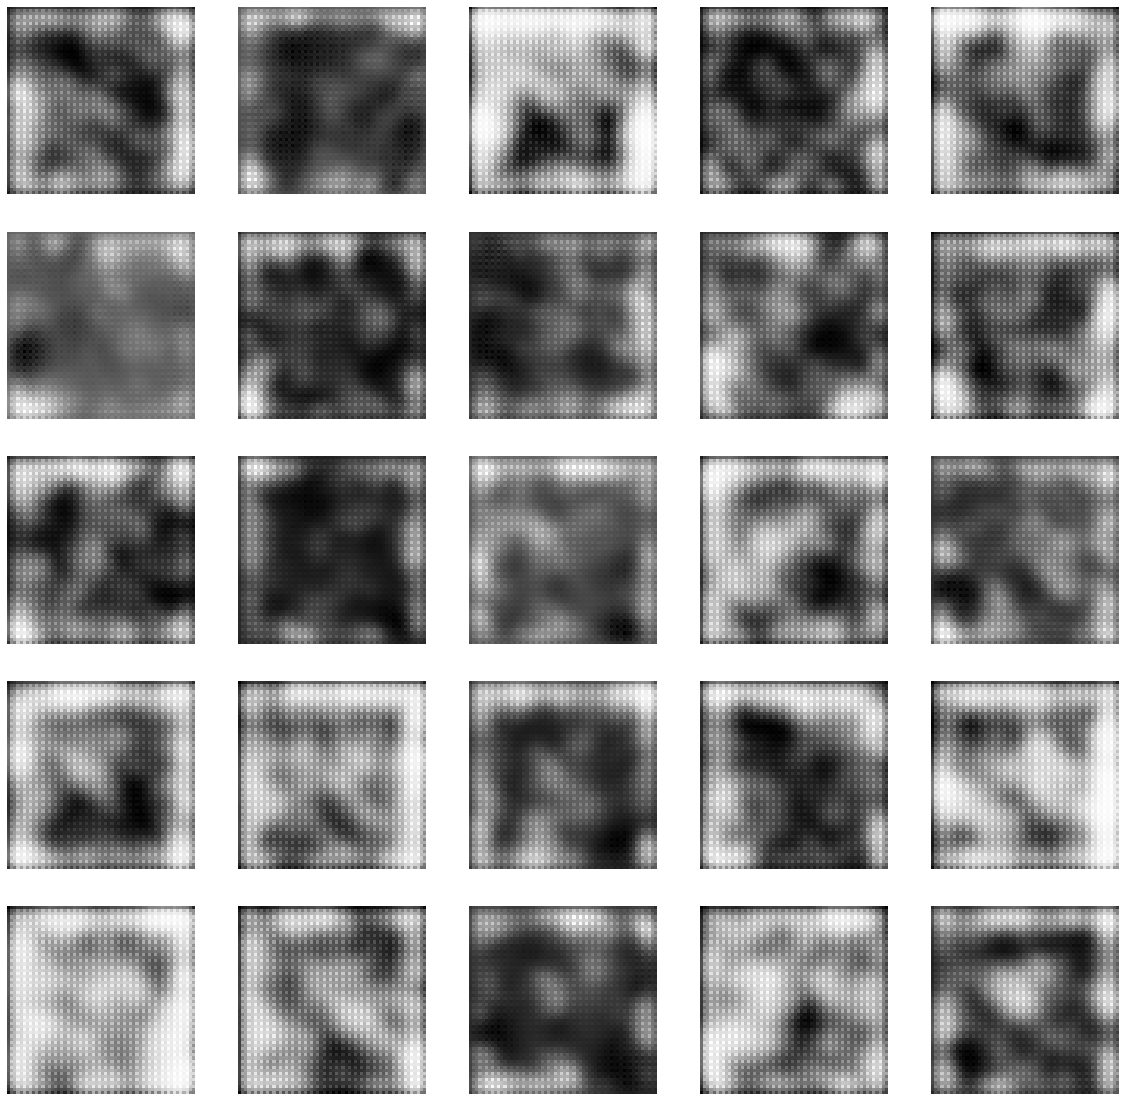

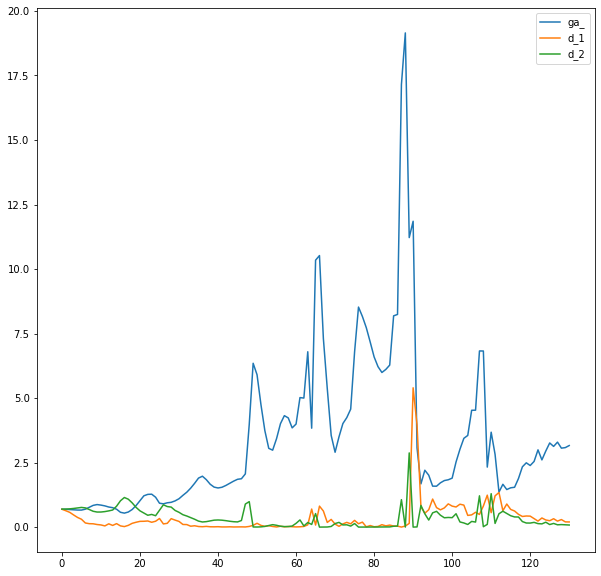

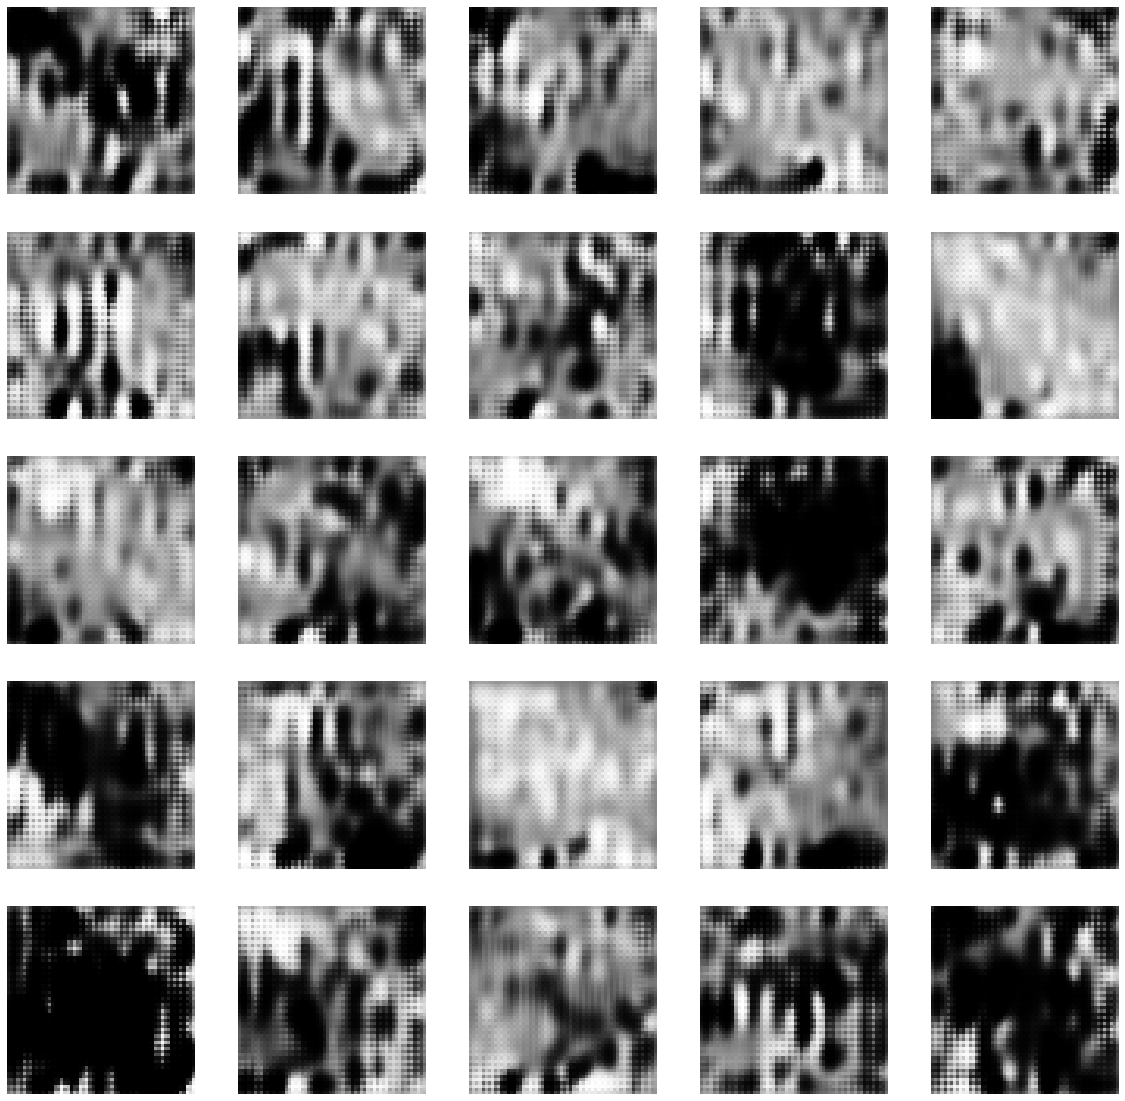

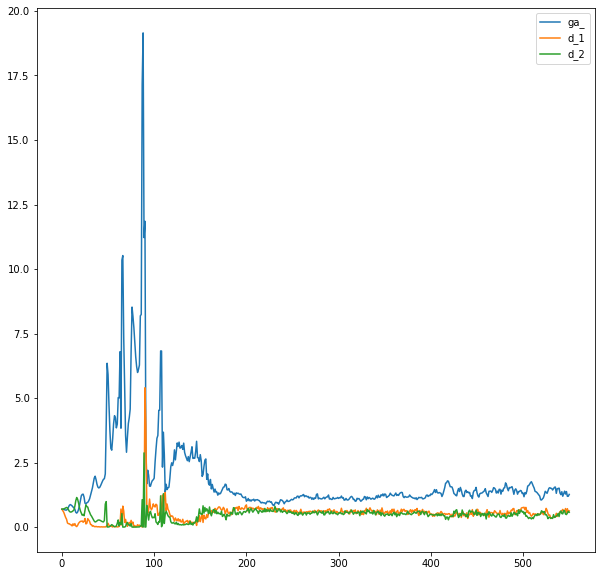

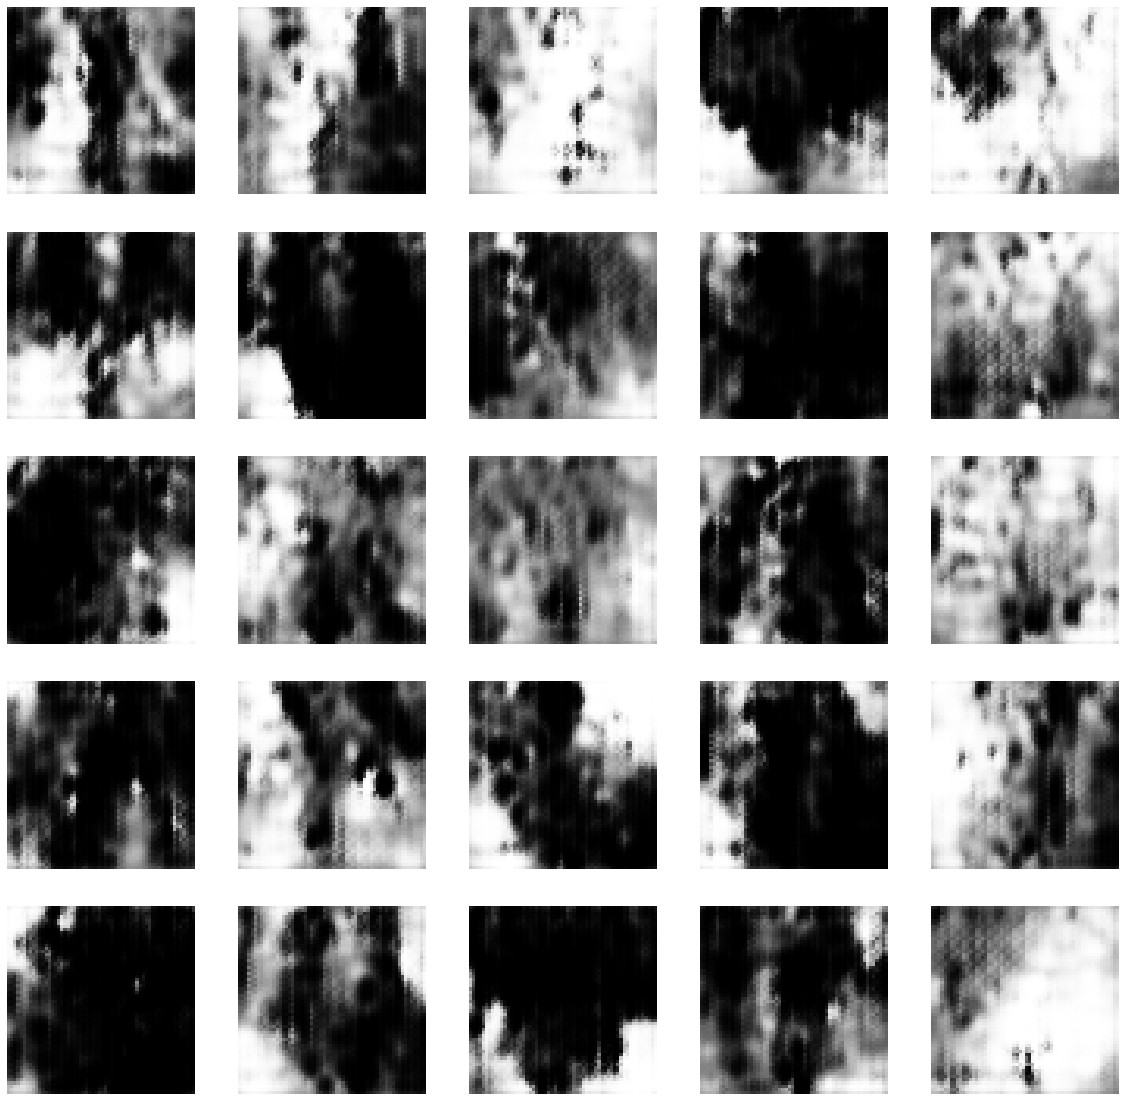

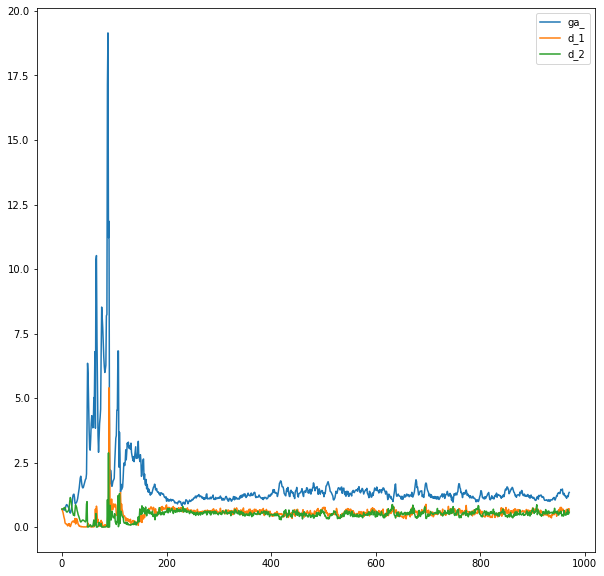

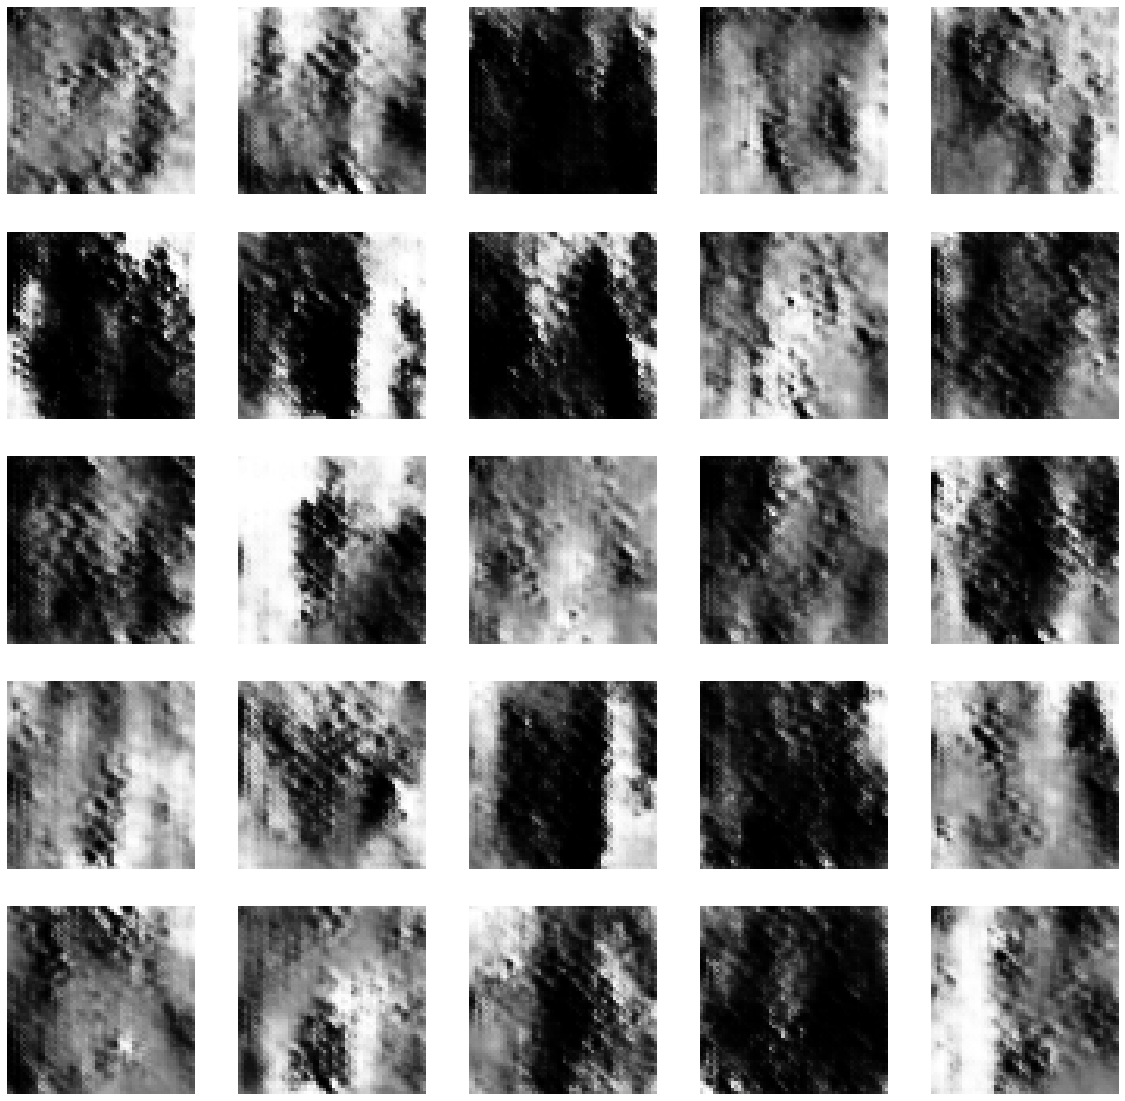

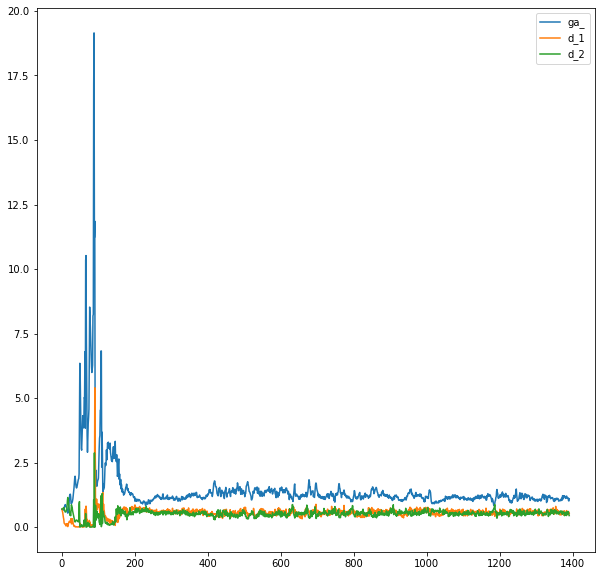

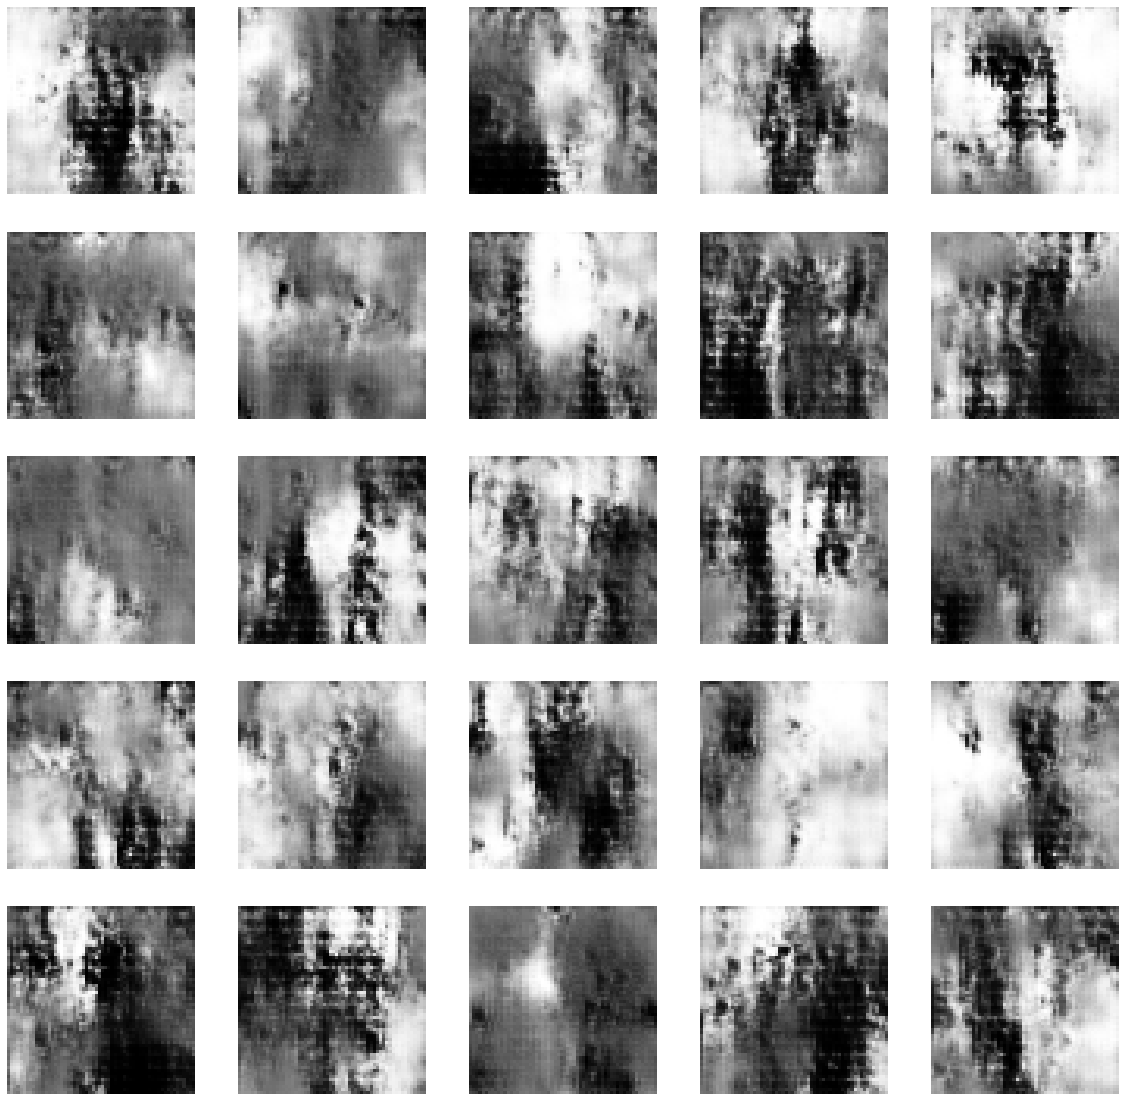

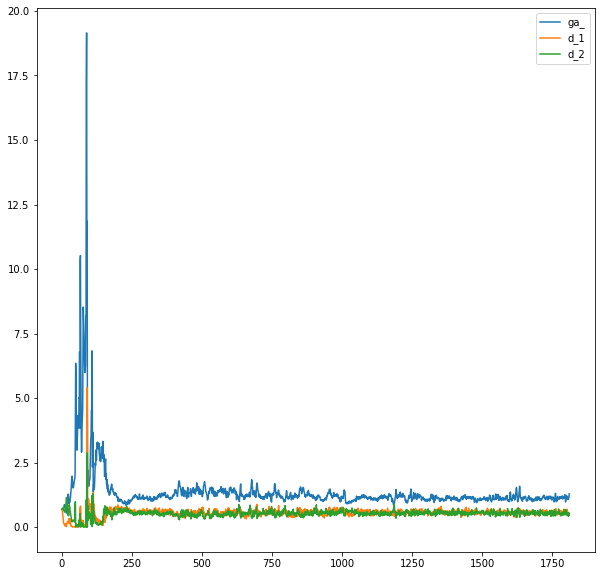

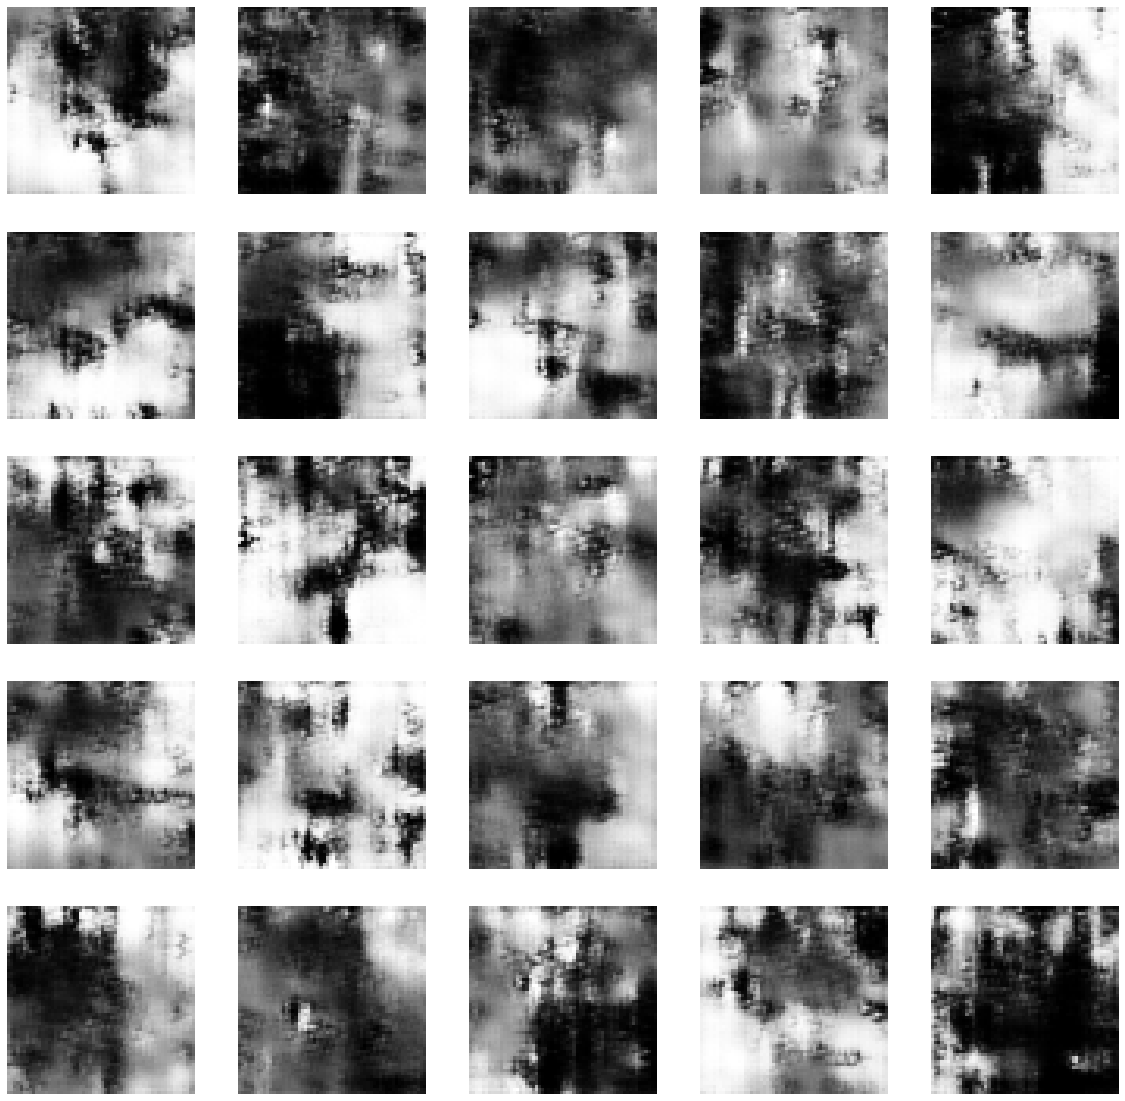

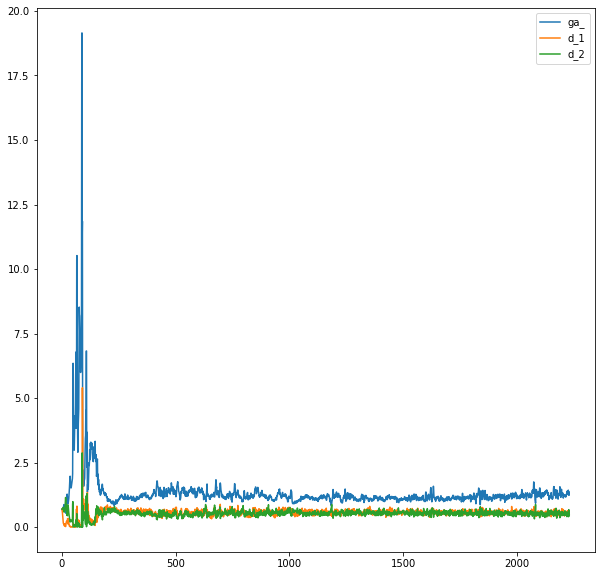

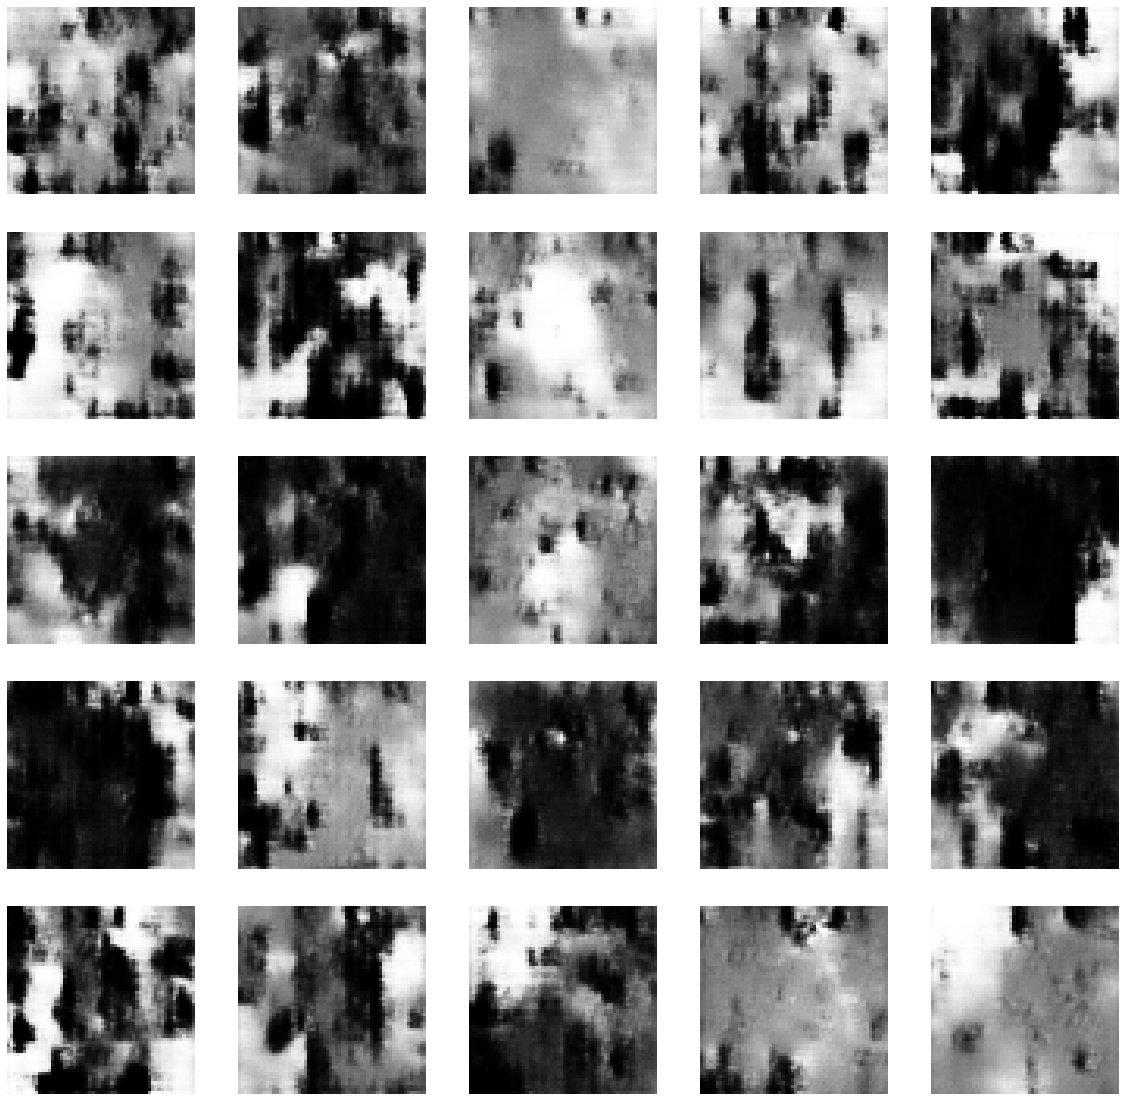

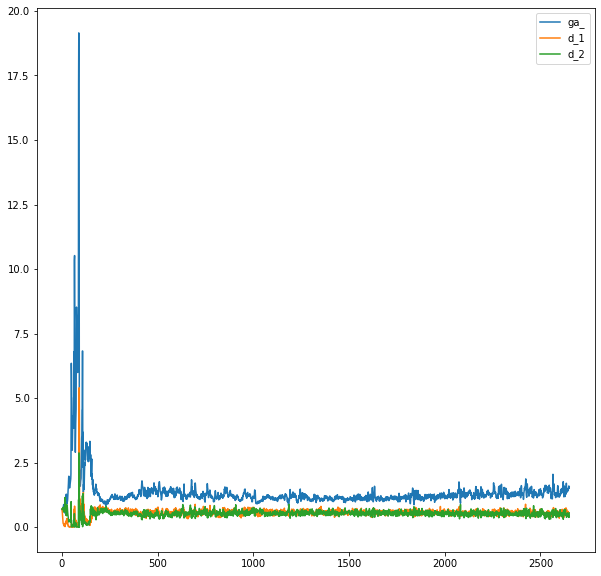

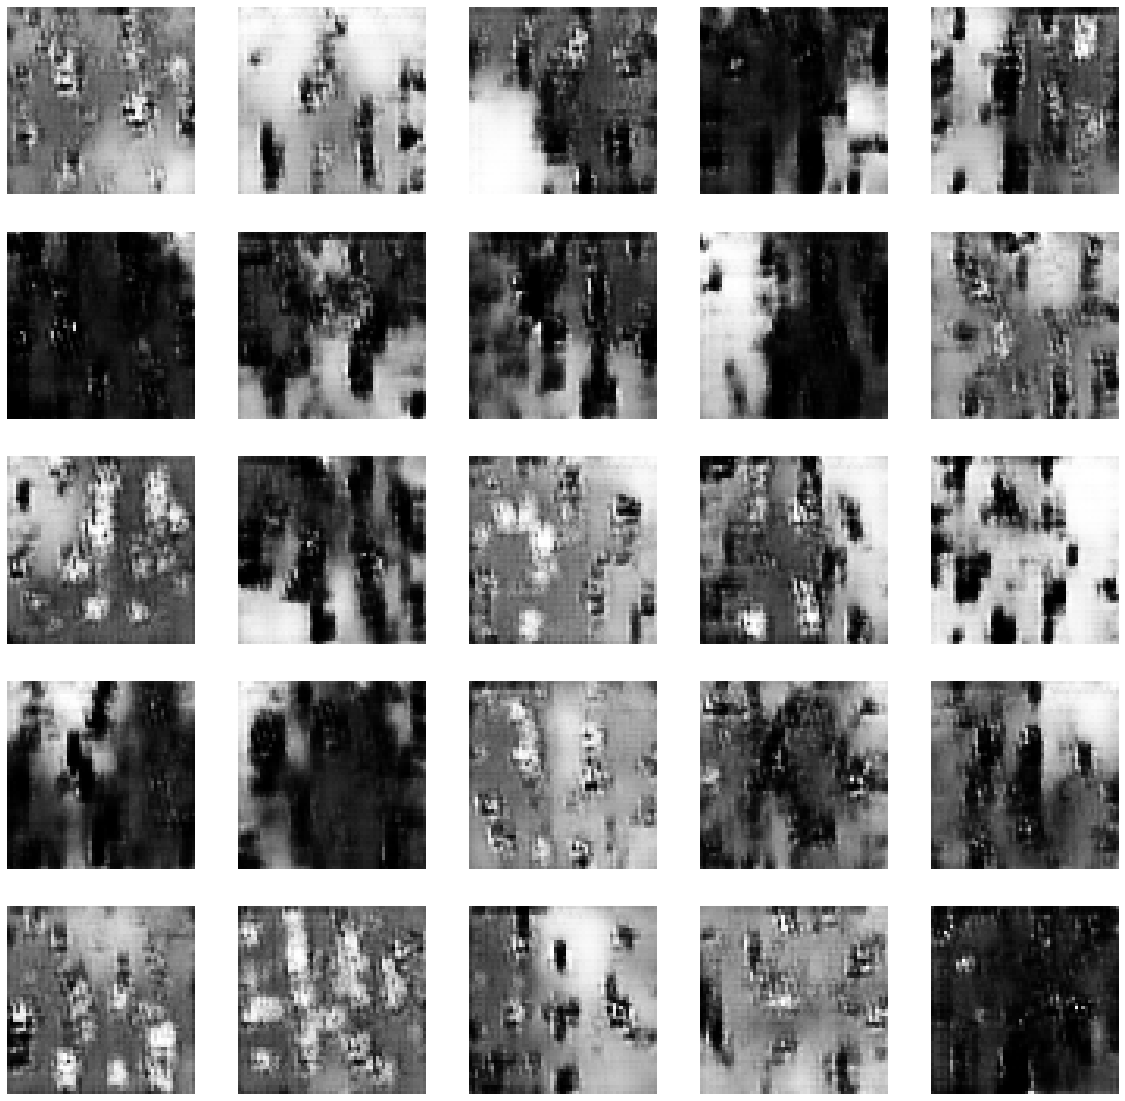

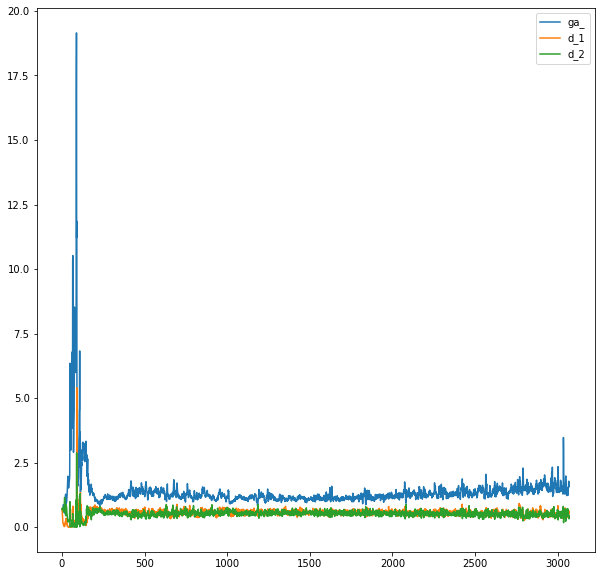

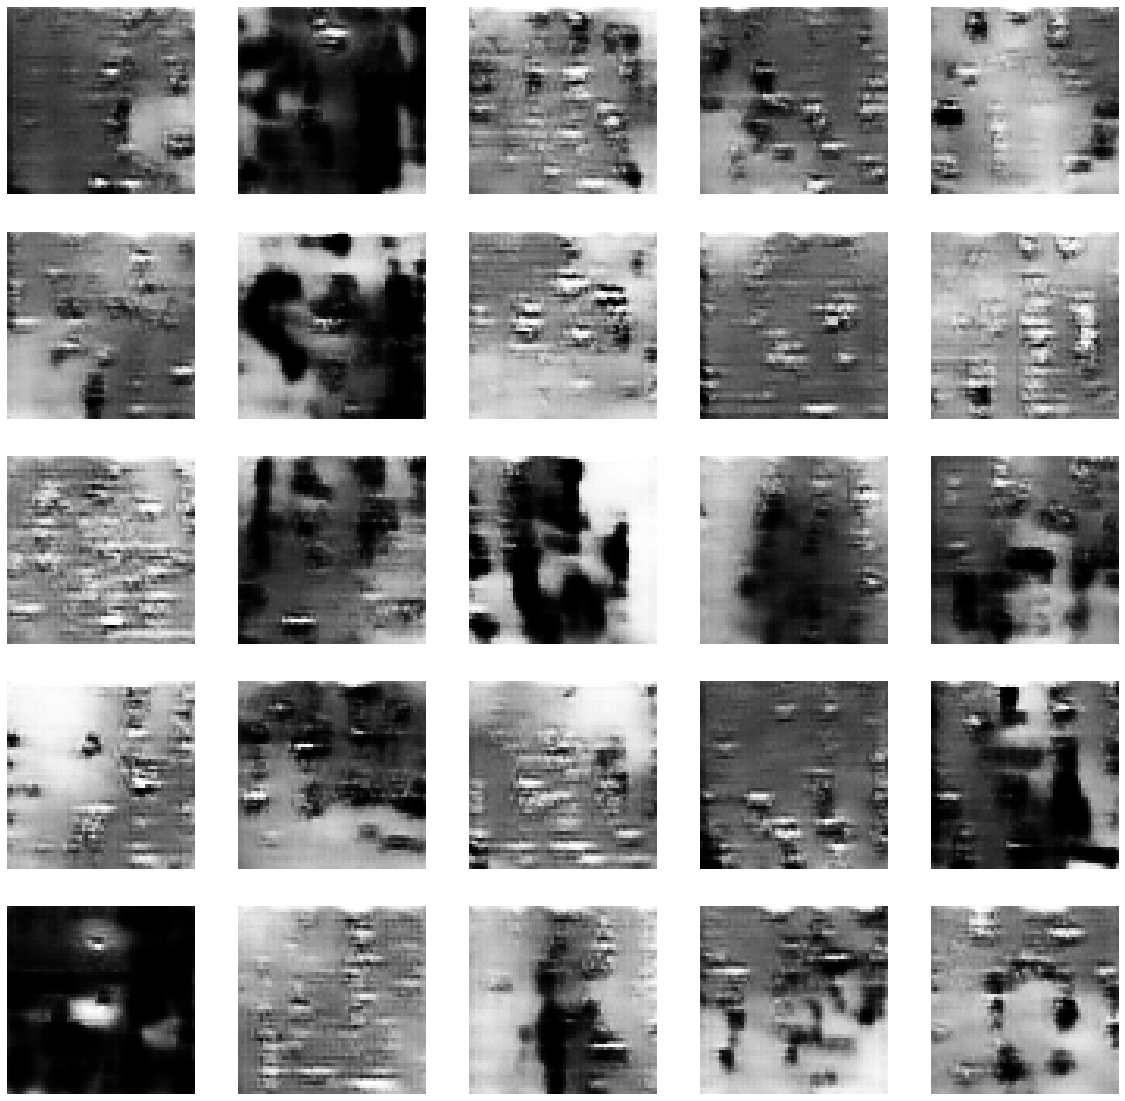

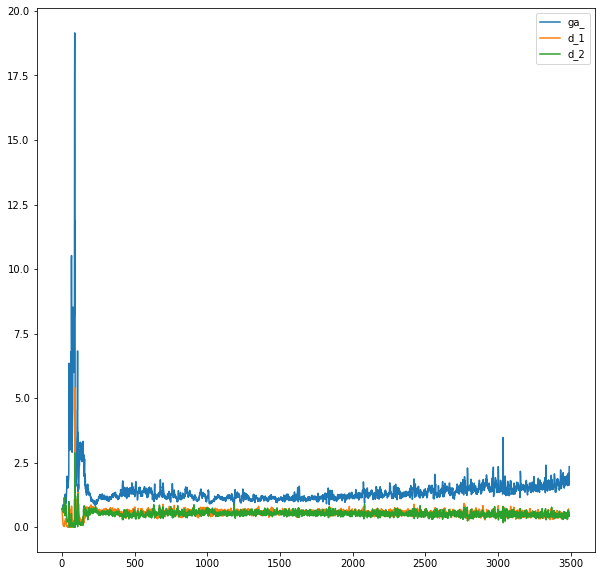

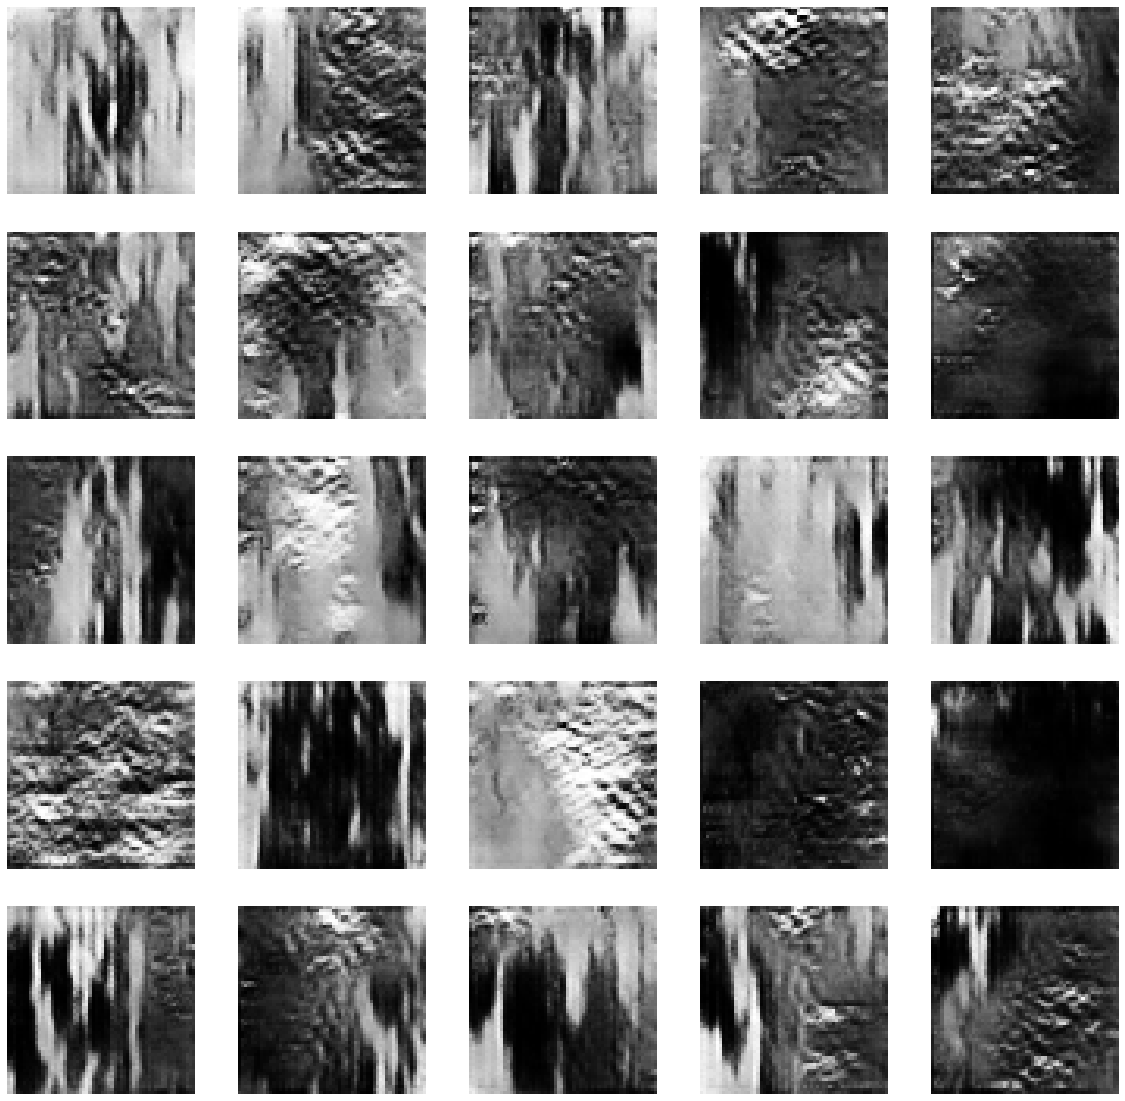

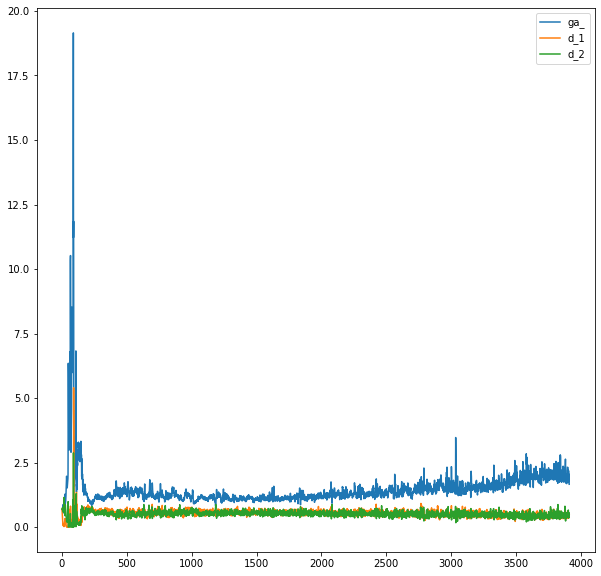

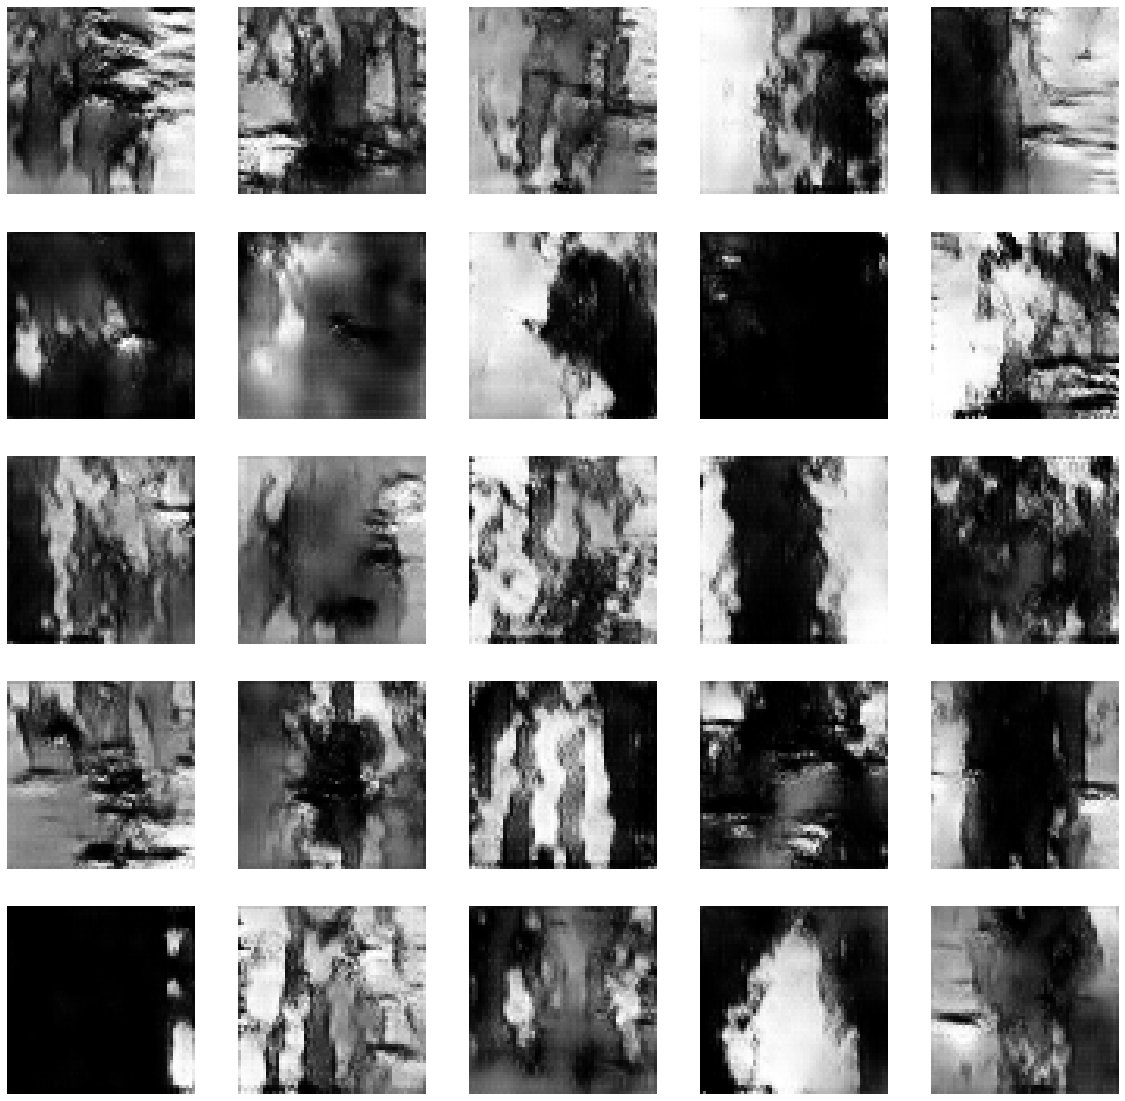

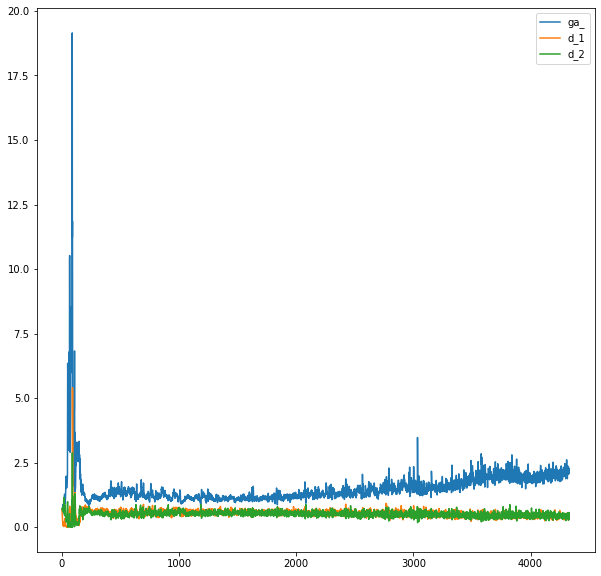

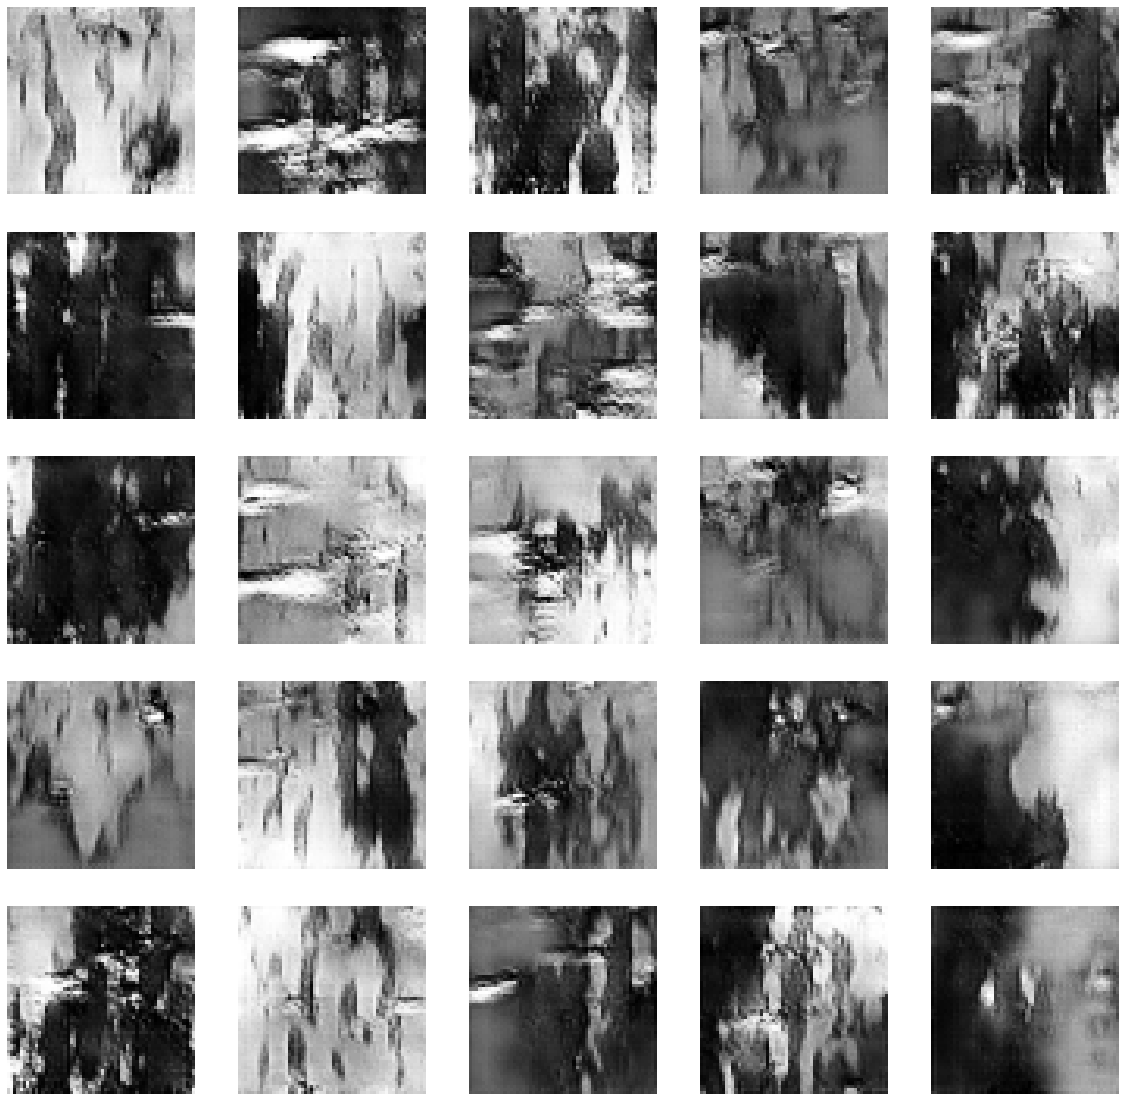

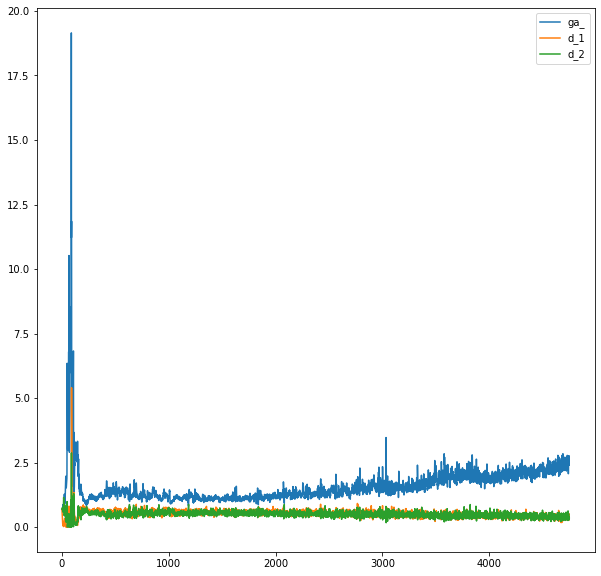

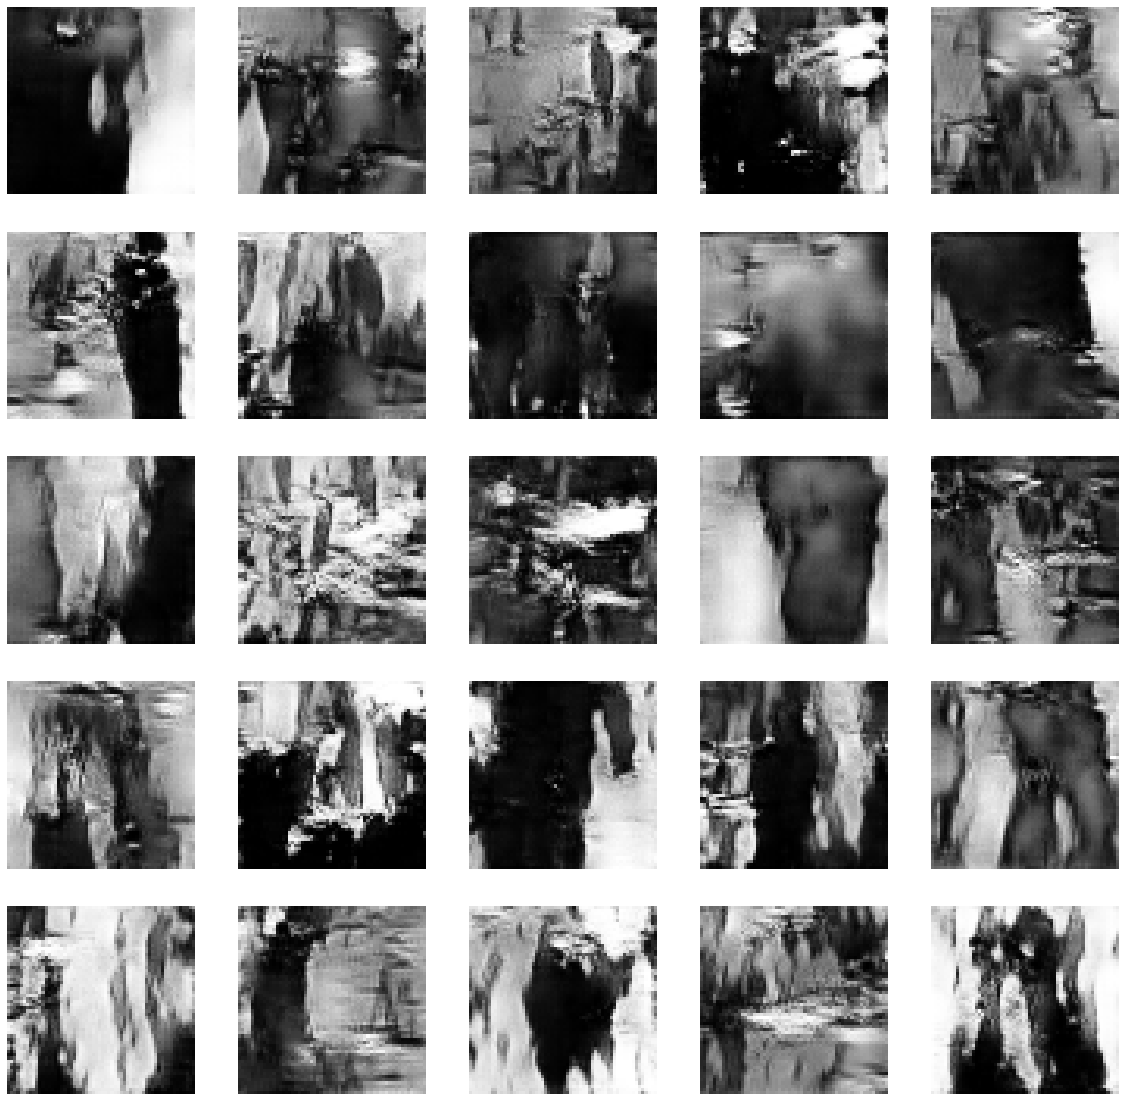

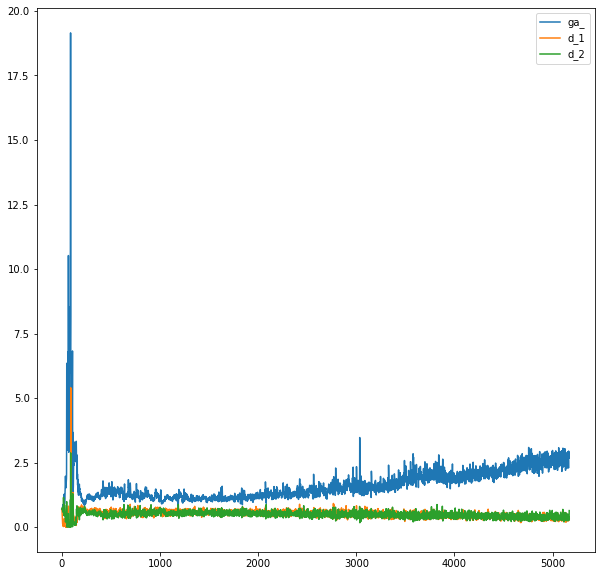

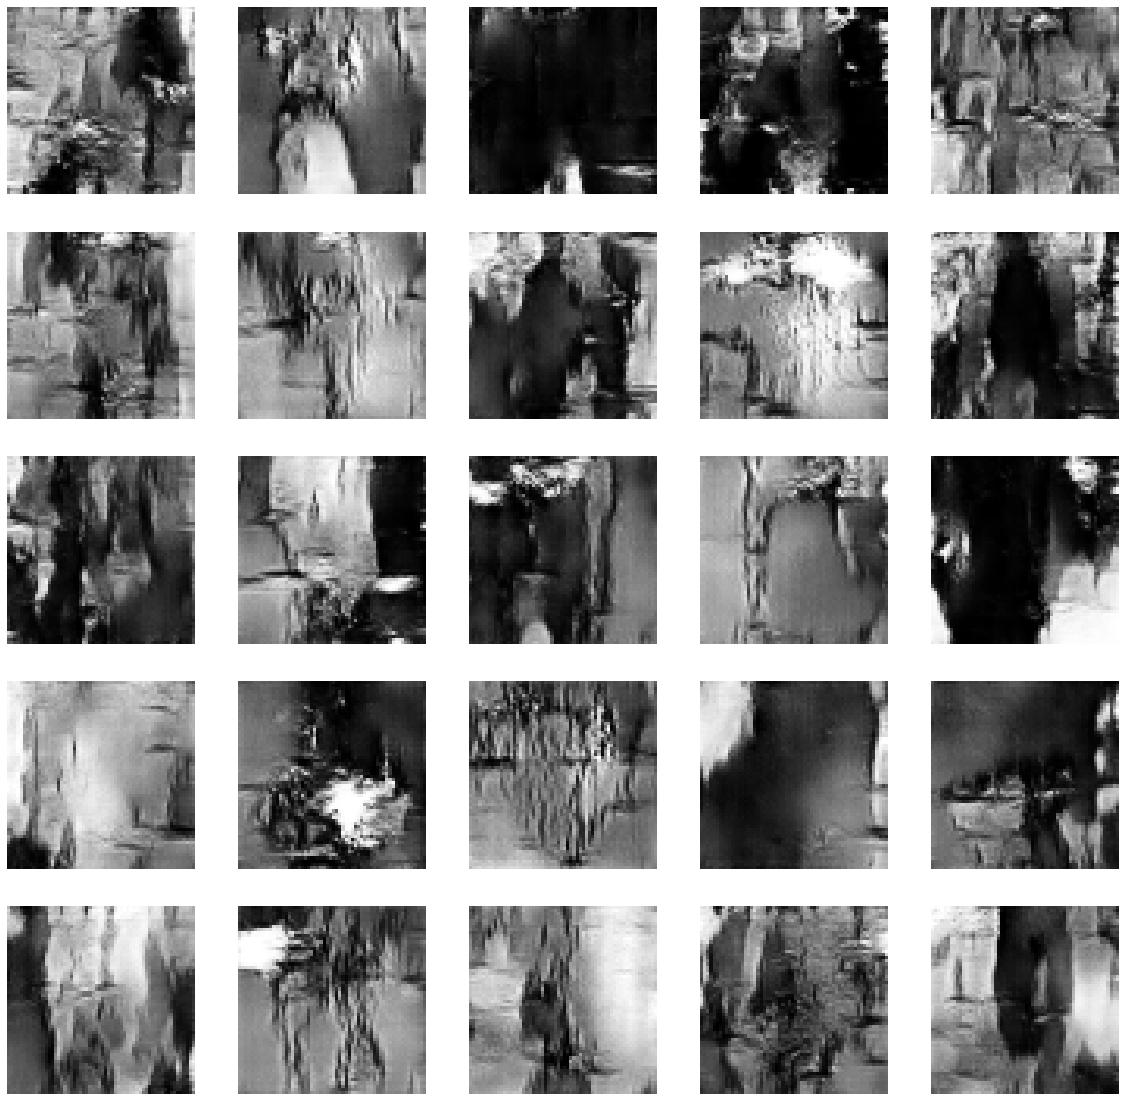

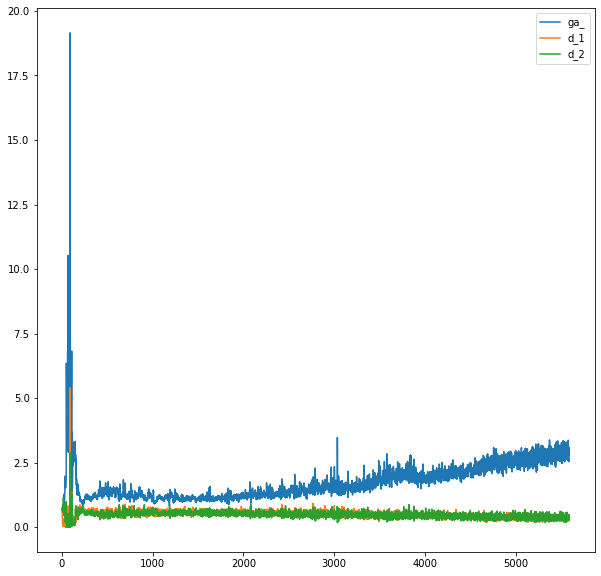

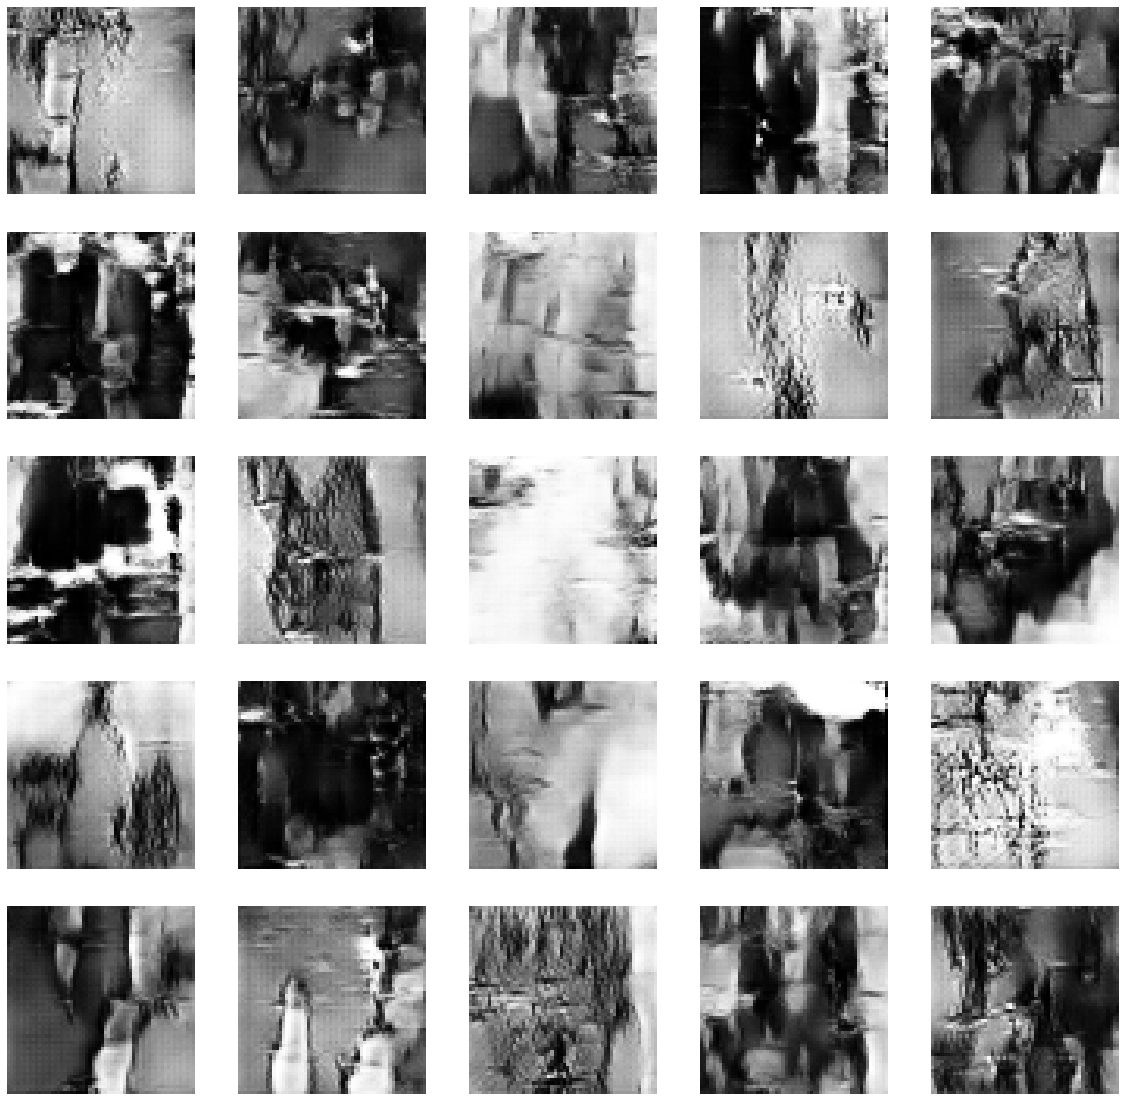

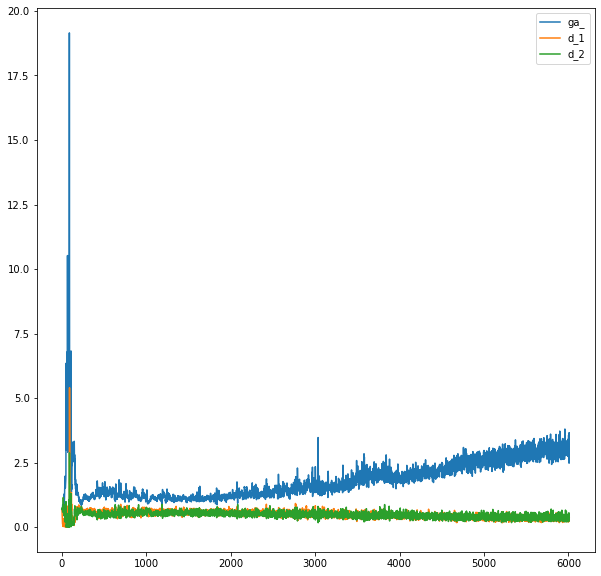

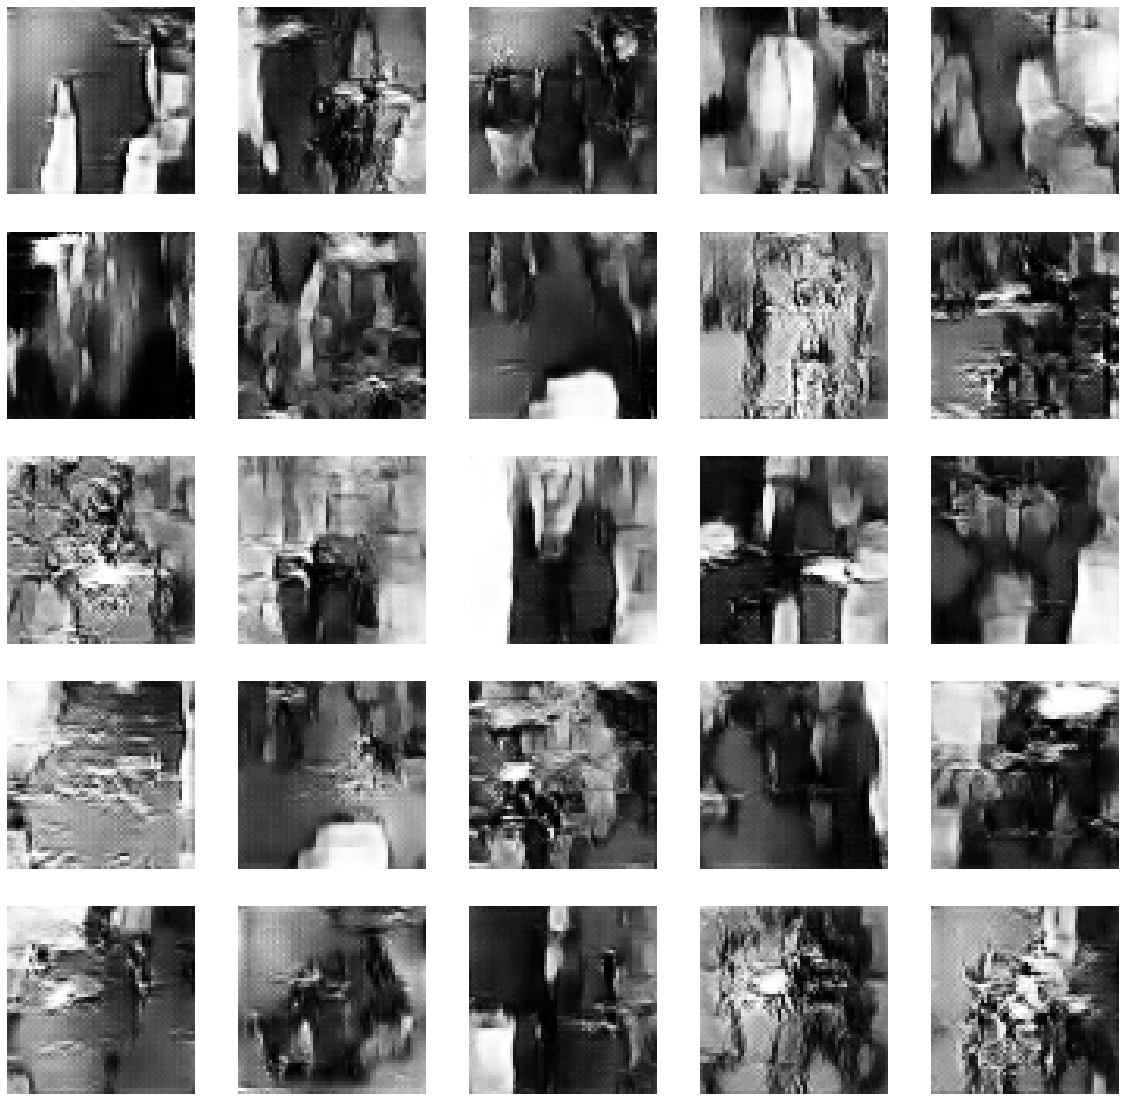

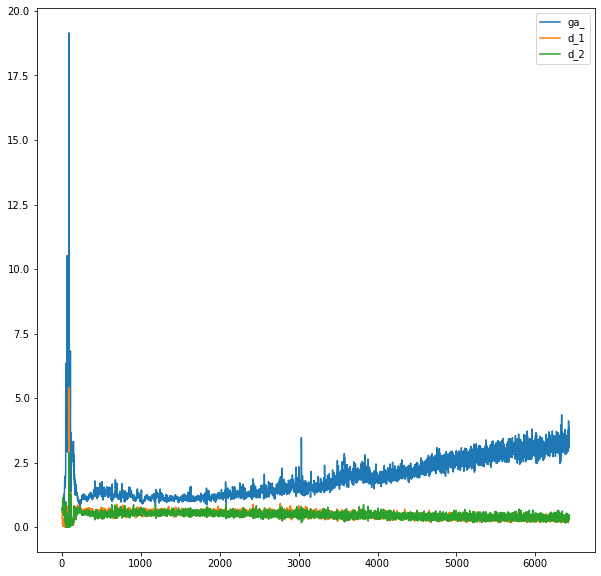

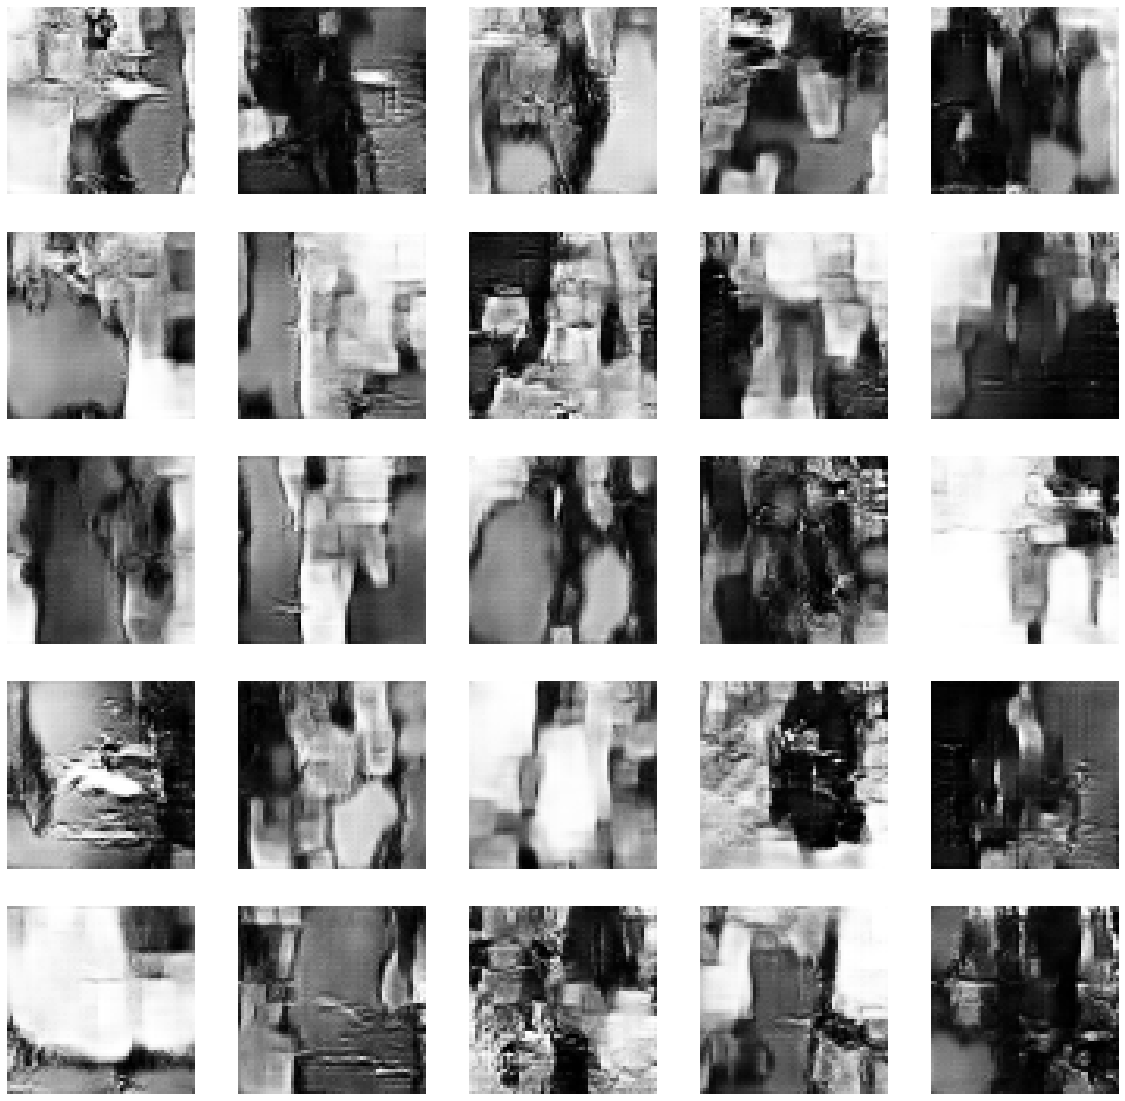

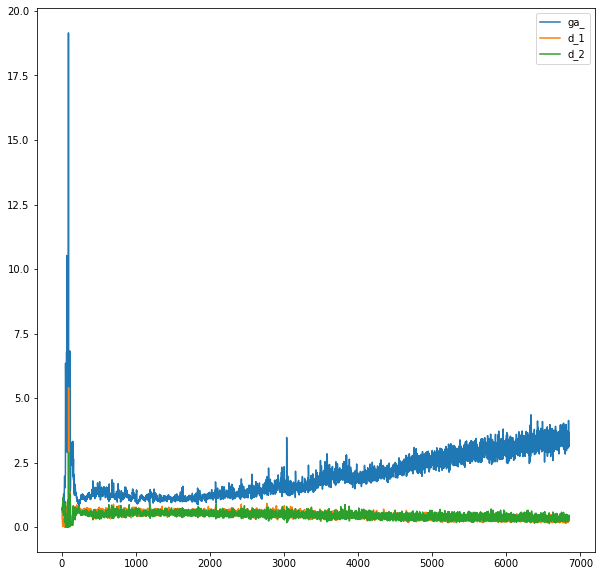

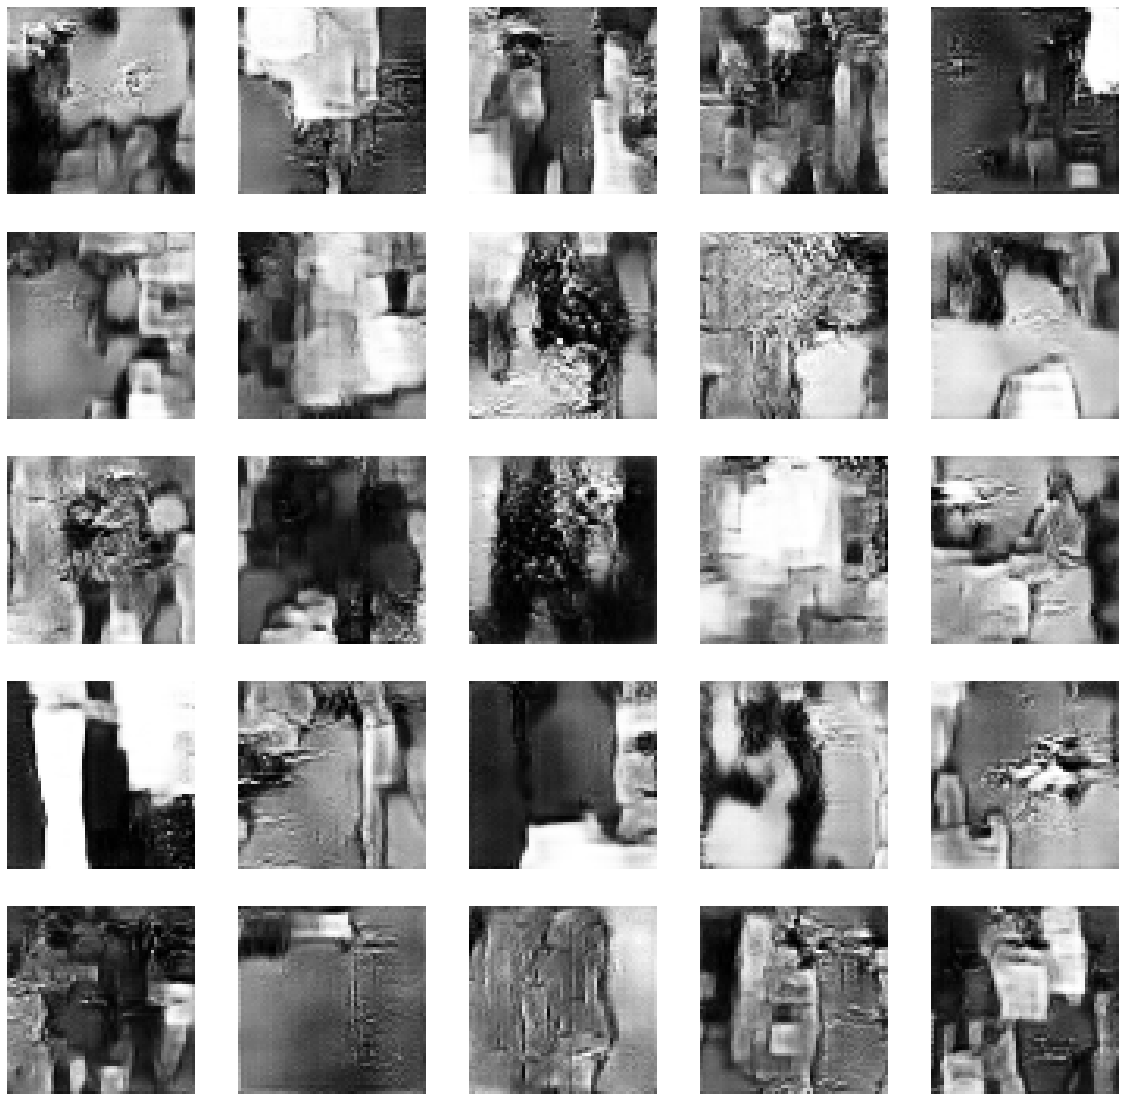

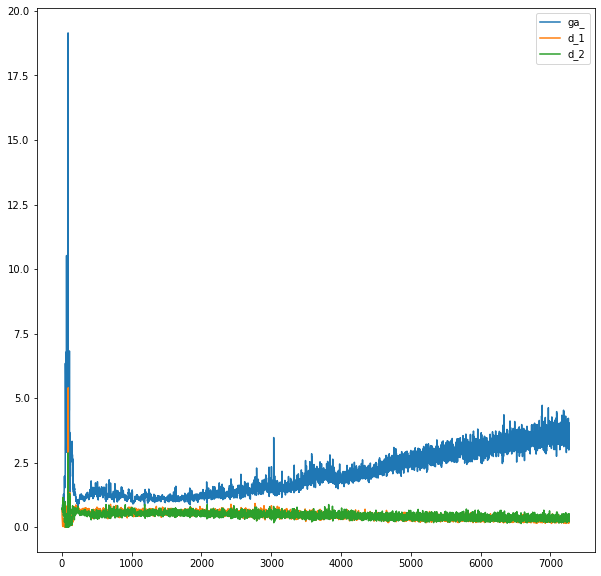

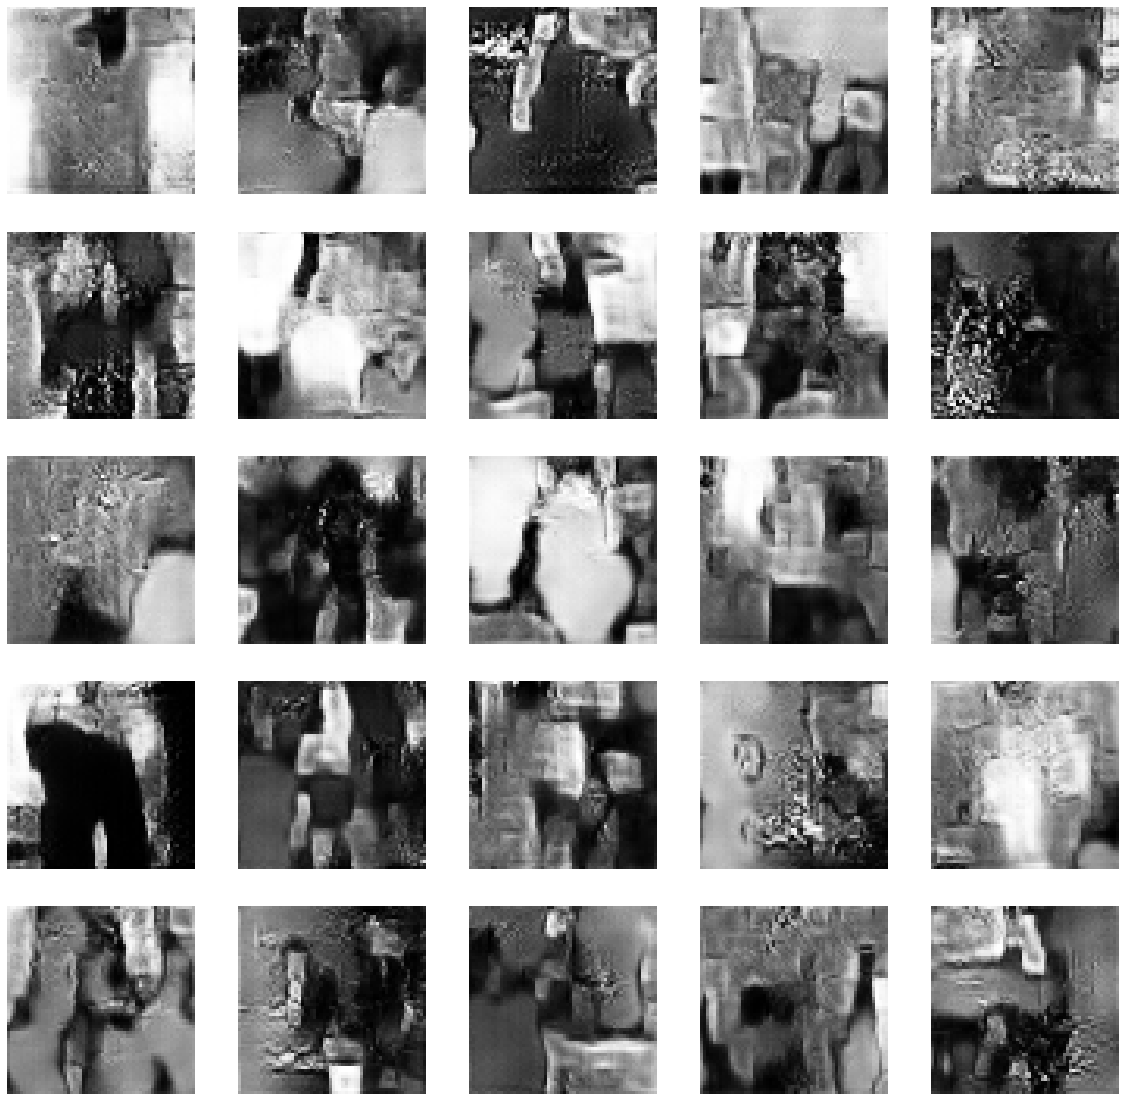

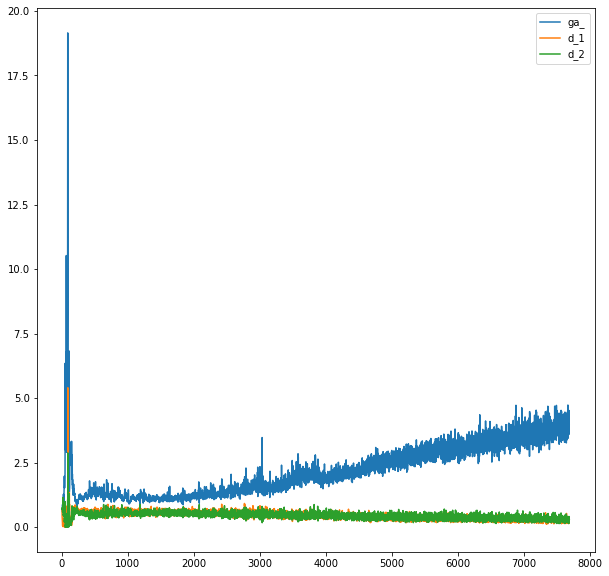

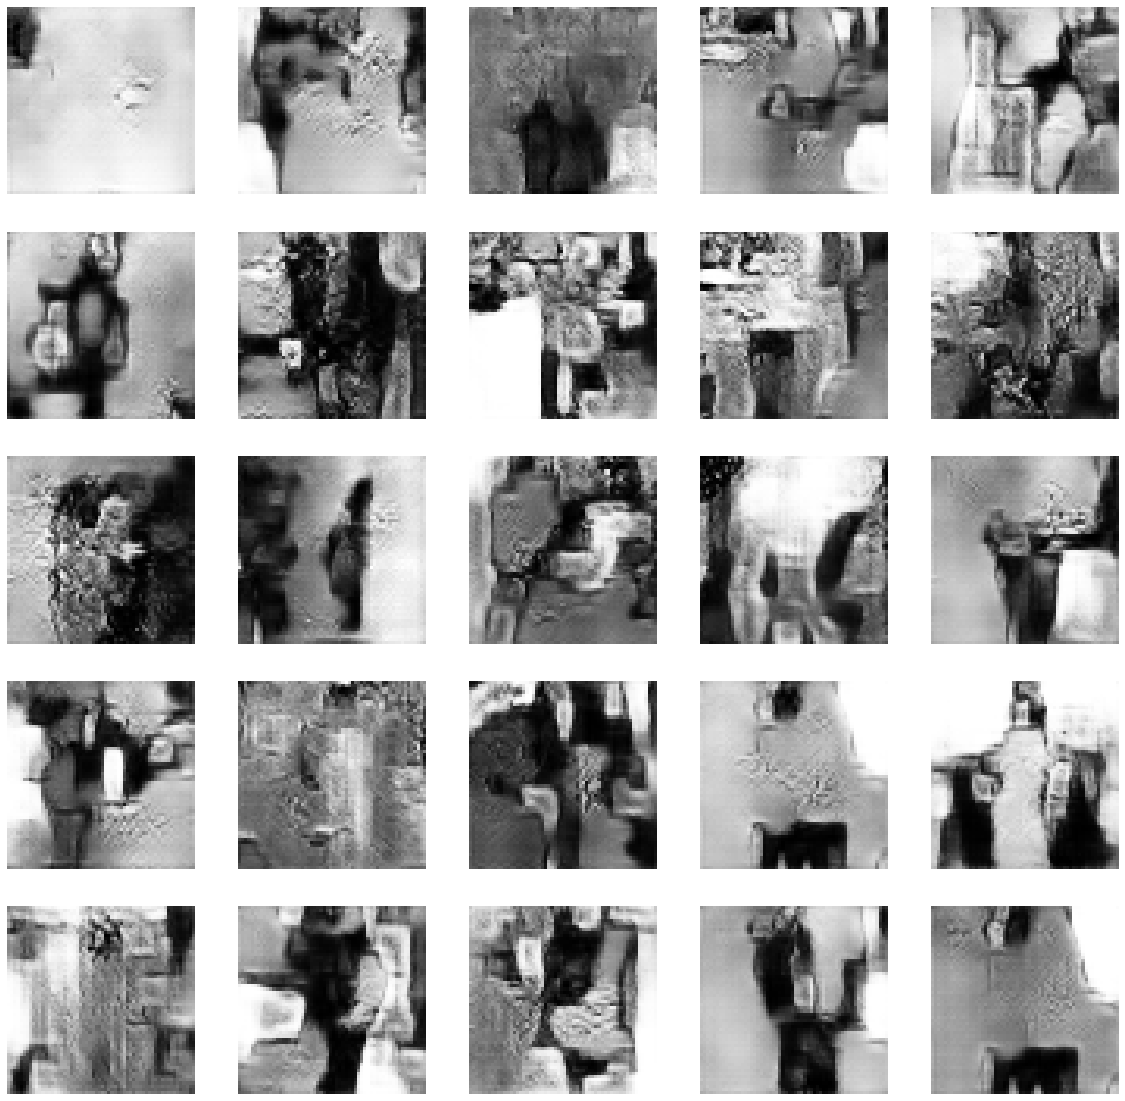

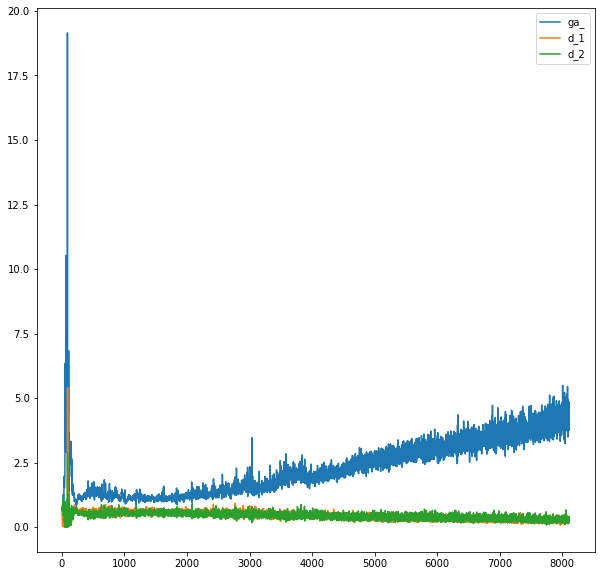

In [75]:
train(gen,dis,gan,100,200)

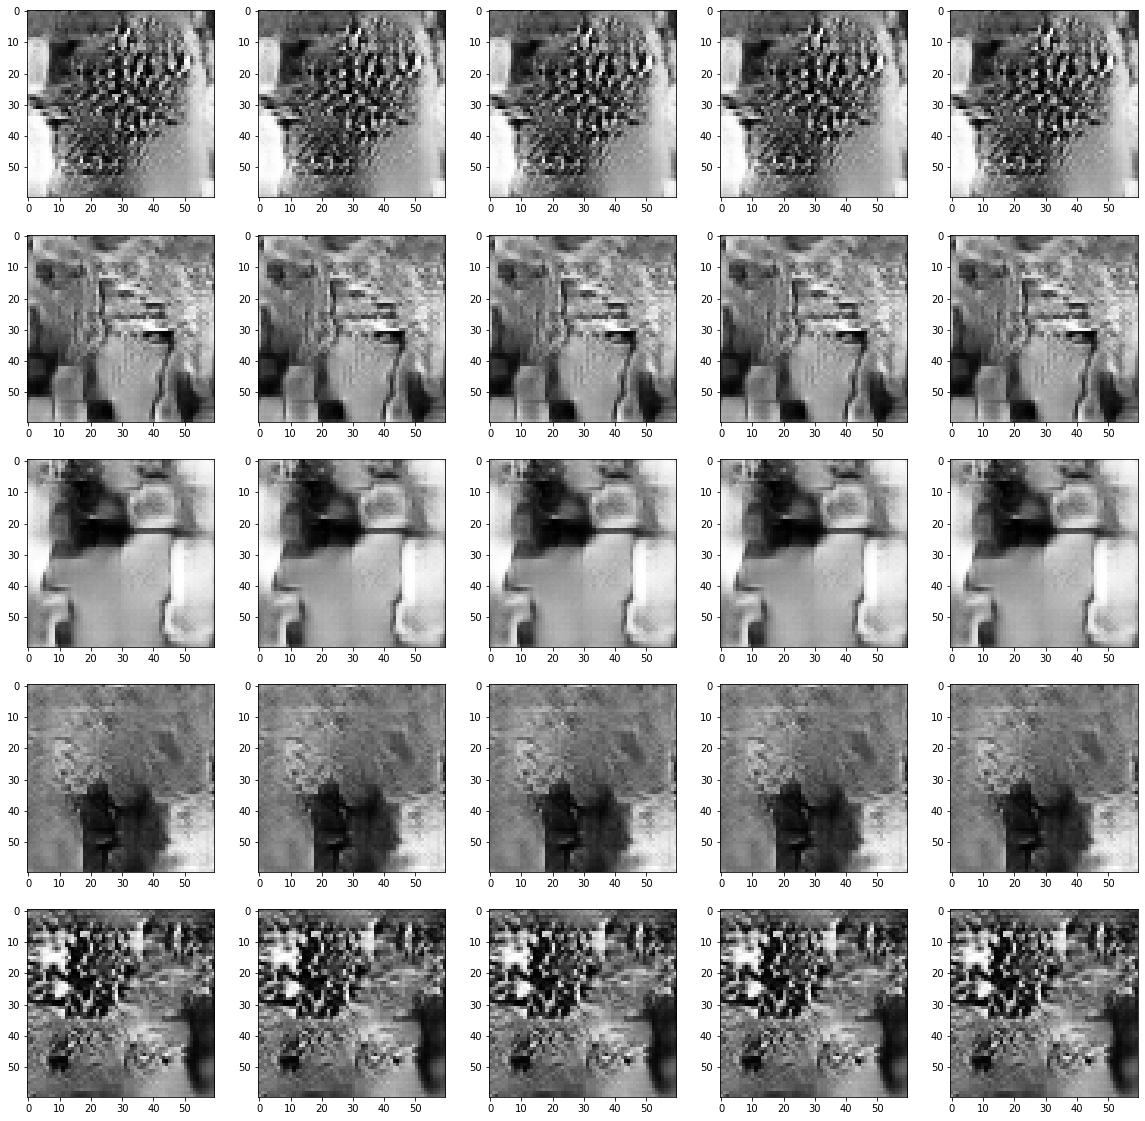

In [87]:
[x,_],_=generate_fake_samples(gen,100,25)
x=np.asarray(x)
x=x.reshape((-1,60,60))

plt.figure(figsize=(20,20))
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(x[i] * 127.5 + 127.5,cmap='gray')

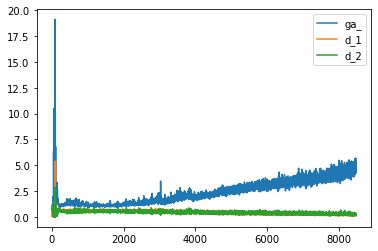

In [80]:
plt.plot(ga_,label='ga_')
plt.plot(d_1,label='d_1')
plt.plot(d_2,label='d_2')
plt.legend()

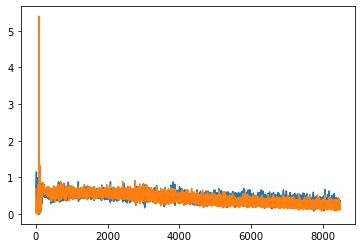

In [81]:
plt.plot(d_2)
plt.plot(d_1)

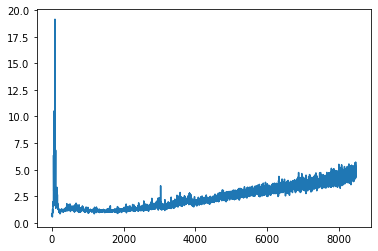

In [82]:
plt.plot(ga_)

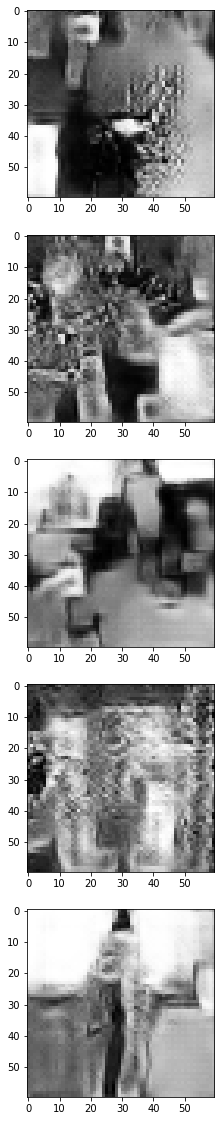

In [89]:
[x,_],_=generate_fake_samples(gen,100,25)
x=np.asarray(x)
x=x.reshape((-1,60,60))
plt.figure(figsize=(20,20))
for i in range(5):
    
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(x[i] * 127.5 + 127.5,cmap='gray')

In [77]:
gen.save("attribute_gen.h5")

In [78]:
gan.save("attribute_gan.h5")

In [79]:
dis.save("attribute_dis.h5")